# Ensemble Techniques Project
Rafael A. Sanchez - rasanchezd@gmail.com\
Git URL: https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-rasanchezd \
October 2020


### Term Deposit Sale

#### Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio. 

#### Resources Available
The historical data for this project is available in file https://archive.ics.uci.edu/ml/datasets/Bank+Marketing



#### Deliverable –1. 
#### Exploratory data quality report reflecting the following. (20 marks)



In [76]:
# Pre-work

# Import libraries, and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

# sklearn
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score
from yellowbrick.classifier import ClassificationReport, ROCAUC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#!pip install imblearn
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')


In [77]:
# Load data
data=pd.read_csv('bank-full.csv')

##### 1. Univariate analysis (12 marks)

In [78]:
# Data types and shape
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(45211, 17)

In [79]:
# Data description
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [80]:
# Head
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [81]:
# Tail
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [82]:
# Missing values
print ("Null values: ", data.isnull().values.any())
print ('')
print (data.isnull().sum())

Null values:  False

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64


In [83]:
# Description of the independent attributes which should include (name, meaning, range of values observed, 
# central values (mean and median), standard deviation and quartiles, analysis of the body of distributions 
# tails, missing values, outliers.

In [84]:
# Age
col = 'age'
print('Name -------------------------:', col)
print('Minimum ----------------------:', data[col].min())
print('Maximum ----------------------:', data[col].max())
print('Mean -------------------------:', data[col].mean())
print('Median -----------------------:', data[col].median())
print('Standard Deviation -----------:', data[col].std())
q1 = data[col].quantile(q=0.25)
q3 = data[col].quantile(q=0.75)
lowerOutliers=q1-1.5*(q3-q1)
upperOutliers=q3+1.5*(q3-q1)
print('Q1 ---------------------------:', q1)
print('Q3 ---------------------------:', q3)
print('Lower Outliers ---------------:', lowerOutliers)
print('Upper Outliers ---------------:', upperOutliers)
print('Number of Upper Outliers -----:', data[data[col]>70.5][col].count())
print('Number of Lower Outliers -----:', data[data[col]<10.5][col].count())
print('Percentage of Upper Outliers -:', round(data[data[col]>70.5][col].count()*100/len(data)),'%')
print('Percentage of Lower Outliers -:', round(data[data[col]<10.5][col].count()*100/len(data)),'%')
print('Null values ------------------:', data[col].isnull().any())

Name -------------------------: age
Minimum ----------------------: 18
Maximum ----------------------: 95
Mean -------------------------: 40.93621021432837
Median -----------------------: 39.0
Standard Deviation -----------: 10.618762040975431
Q1 ---------------------------: 33.0
Q3 ---------------------------: 48.0
Lower Outliers ---------------: 10.5
Upper Outliers ---------------: 70.5
Number of Upper Outliers -----: 487
Number of Lower Outliers -----: 0
Percentage of Upper Outliers -: 1.0 %
Percentage of Lower Outliers -: 0.0 %
Null values ------------------: False


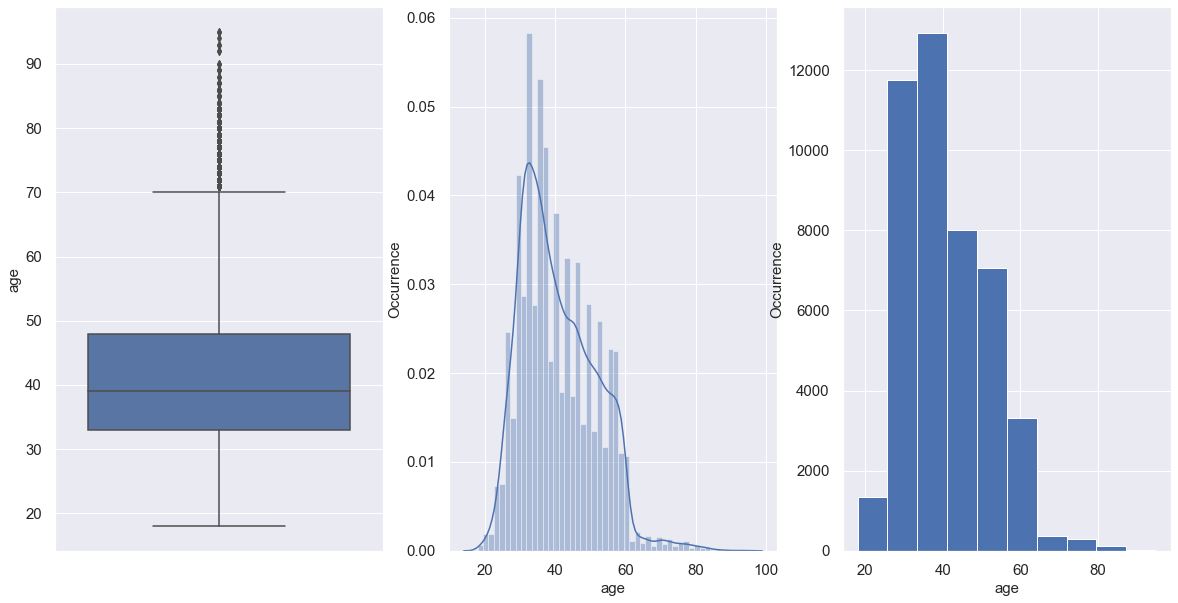

In [85]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,10))

#boxplot
sns.boxplot(x=col,data=data,orient='v',ax=ax1)
ax1.set_ylabel(col, fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data[col],ax=ax2)
ax2.set_xlabel(col, fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data[col])
ax3.set_xlabel(col, fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)


job
admin.           5171
blue-collar      9732
entrepreneur     1487
housemaid        1240
management       9458
retired          2264
self-employed    1579
services         4154
student           938
technician       7597
unemployed       1303
unknown           288
dtype: int64


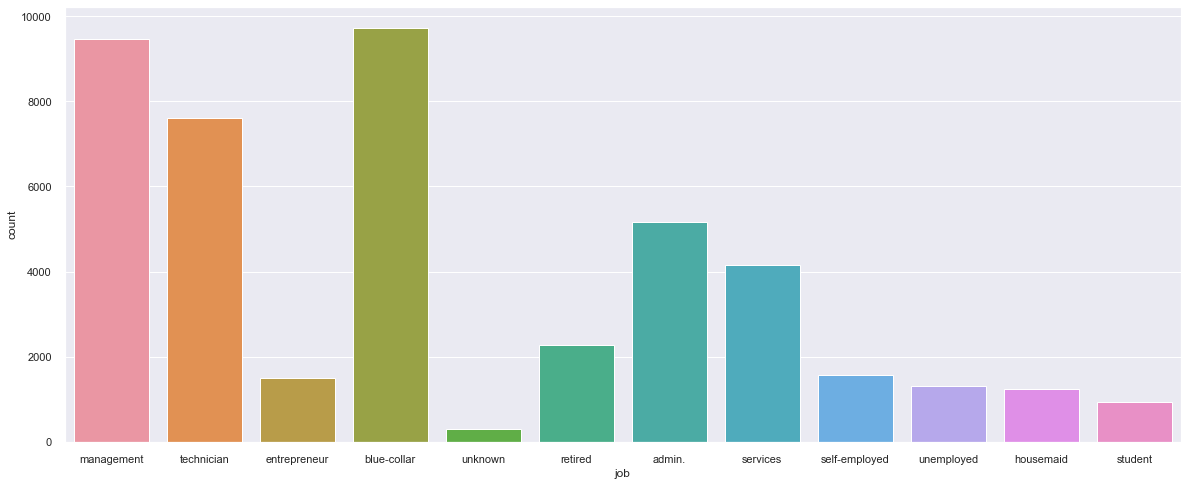

In [86]:
# Job
# Lets see how many values does it have and how many per category
col = 'job'
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)

job
blue-collar     24302
unemployed       4793
white-collar    16116
dtype: int64


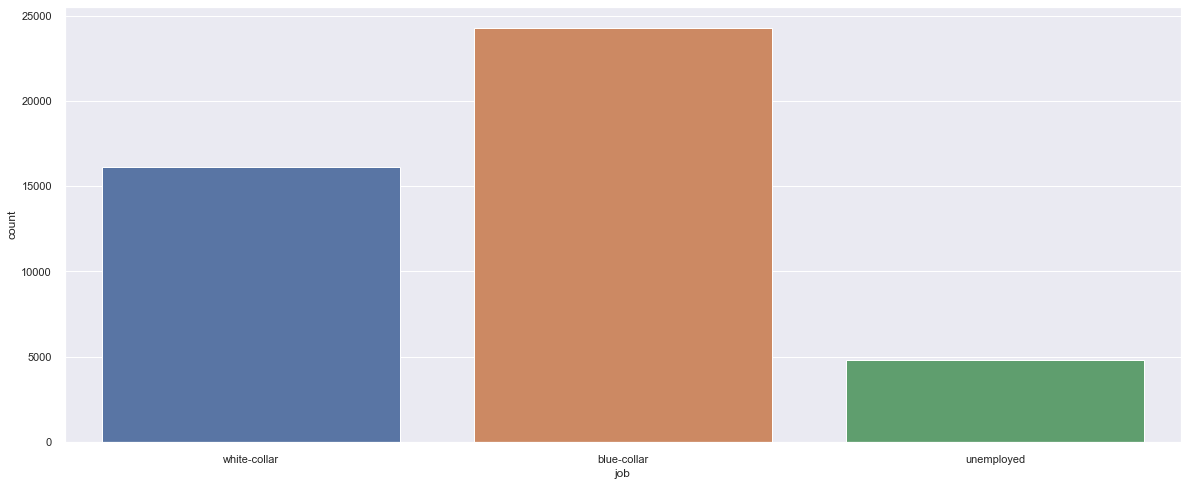

In [87]:
# Optimize classes in job
data[col]=np.where(data[col]=='student','unemployed',data[col])
data[col]=np.where(data[col]=='unknown','unemployed',data[col])
data[col]=np.where(data[col]=='retired','unemployed',data[col])
data[col]=np.where(data[col]=='housemaid','blue-collar',data[col])
data[col]=np.where(data[col]=='technician','blue-collar',data[col])
data[col]=np.where(data[col]=='services','blue-collar',data[col])
data[col]=np.where(data[col]=='self-employed','blue-collar',data[col])
data[col]=np.where(data[col]=='management','white-collar',data[col])
data[col]=np.where(data[col]=='admin.','white-collar',data[col])
data[col]=np.where(data[col]=='entrepreneur','white-collar',data[col])
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)

marital
divorced     5207
married     27214
single      12790
dtype: int64


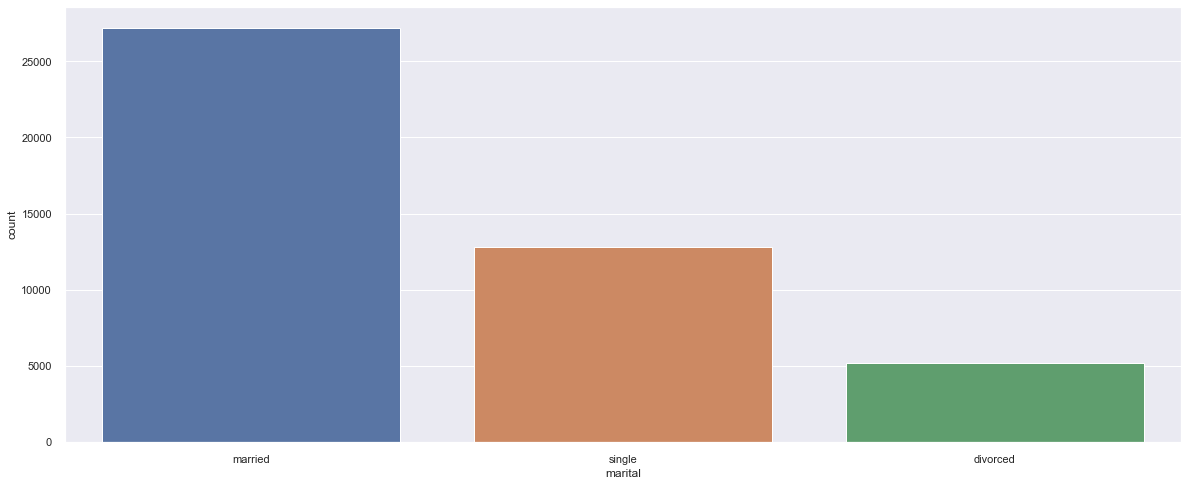

In [88]:
# Marital
# Lets see how many values does it have and how many per category
col = 'marital'
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64


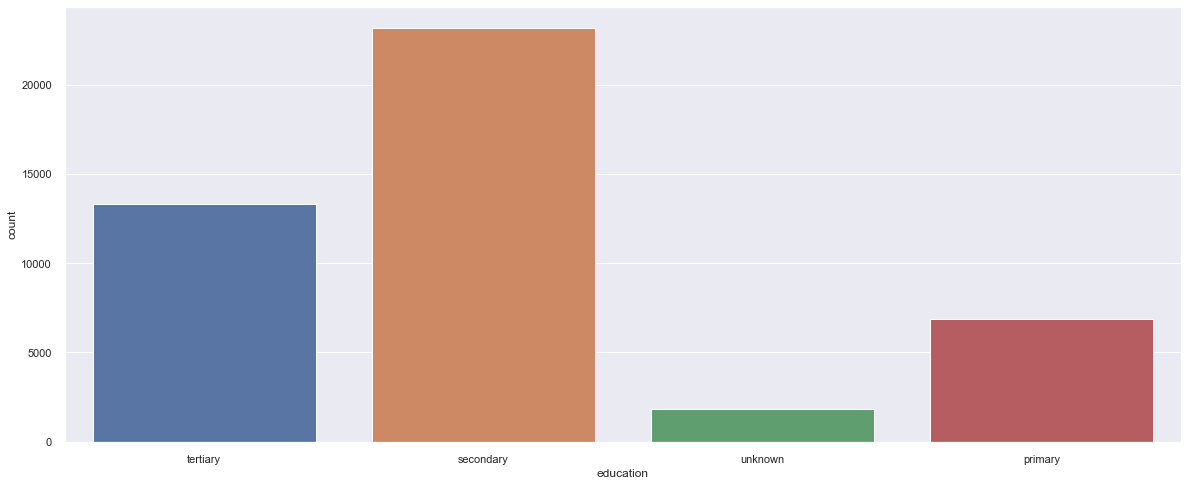

In [89]:
# Education
# Lets see how many values does it have and how many per category
col = 'education'
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)

default
no     44396
yes      815
dtype: int64


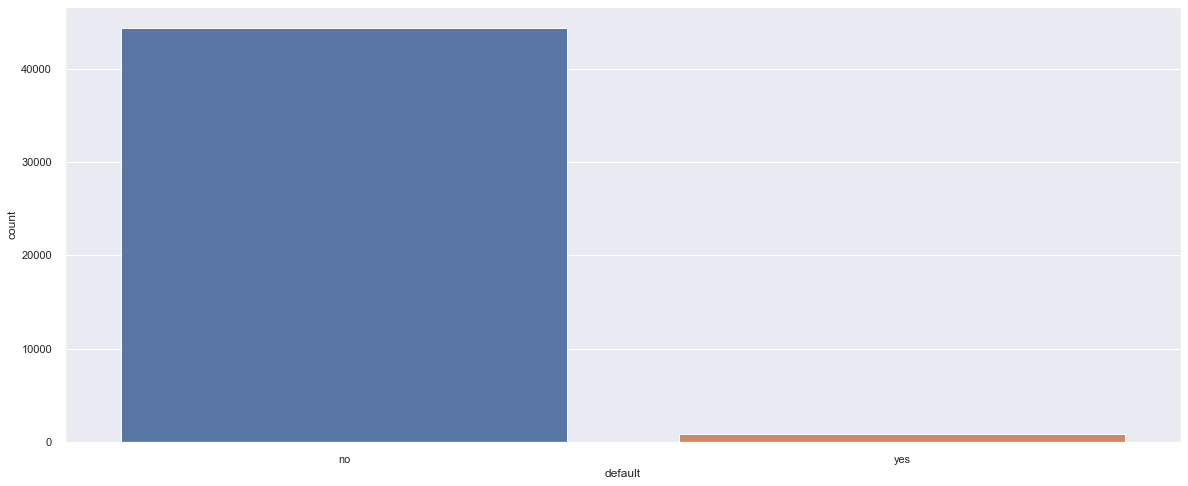

In [90]:
# Default
# Lets see how many values does it have and how many per category
col = 'default'
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)

In [91]:
# Balance
# Age
col = 'balance'
print('Name -------------------------:', col)
print('Minimum ----------------------:', data[col].min())
print('Maximum ----------------------:', data[col].max())
print('Mean -------------------------:', data[col].mean())
print('Median -----------------------:', data[col].median())
print('Standard Deviation -----------:', data[col].std())
q1 = data[col].quantile(q=0.25)
q3 = data[col].quantile(q=0.75)
lowerOutliers=q1-1.5*(q3-q1)
upperOutliers=q3+1.5*(q3-q1)
print('Q1 ---------------------------:', q1)
print('Q3 ---------------------------:', q3)
print('Lower Outliers ---------------:', lowerOutliers)
print('Upper Outliers ---------------:', upperOutliers)
print('Number of Upper Outliers -----:', data[data[col]>70.5][col].count())
print('Number of Lower Outliers -----:', data[data[col]<10.5][col].count())
print('Percentage of Upper Outliers -:', round(data[data[col]>70.5][col].count()*100/len(data)),'%')
print('Percentage of Lower Outliers -:', round(data[data[col]<10.5][col].count()*100/len(data)),'%')
print('Null values ------------------:', data[col].isnull().any())

Name -------------------------: balance
Minimum ----------------------: -8019
Maximum ----------------------: 102127
Mean -------------------------: 1362.2720576850766
Median -----------------------: 448.0
Standard Deviation -----------: 3044.7658291686002
Q1 ---------------------------: 72.0
Q3 ---------------------------: 1428.0
Lower Outliers ---------------: -1962.0
Upper Outliers ---------------: 3462.0
Number of Upper Outliers -----: 33981
Number of Lower Outliers -----: 8378
Percentage of Upper Outliers -: 75.0 %
Percentage of Lower Outliers -: 19.0 %
Null values ------------------: False


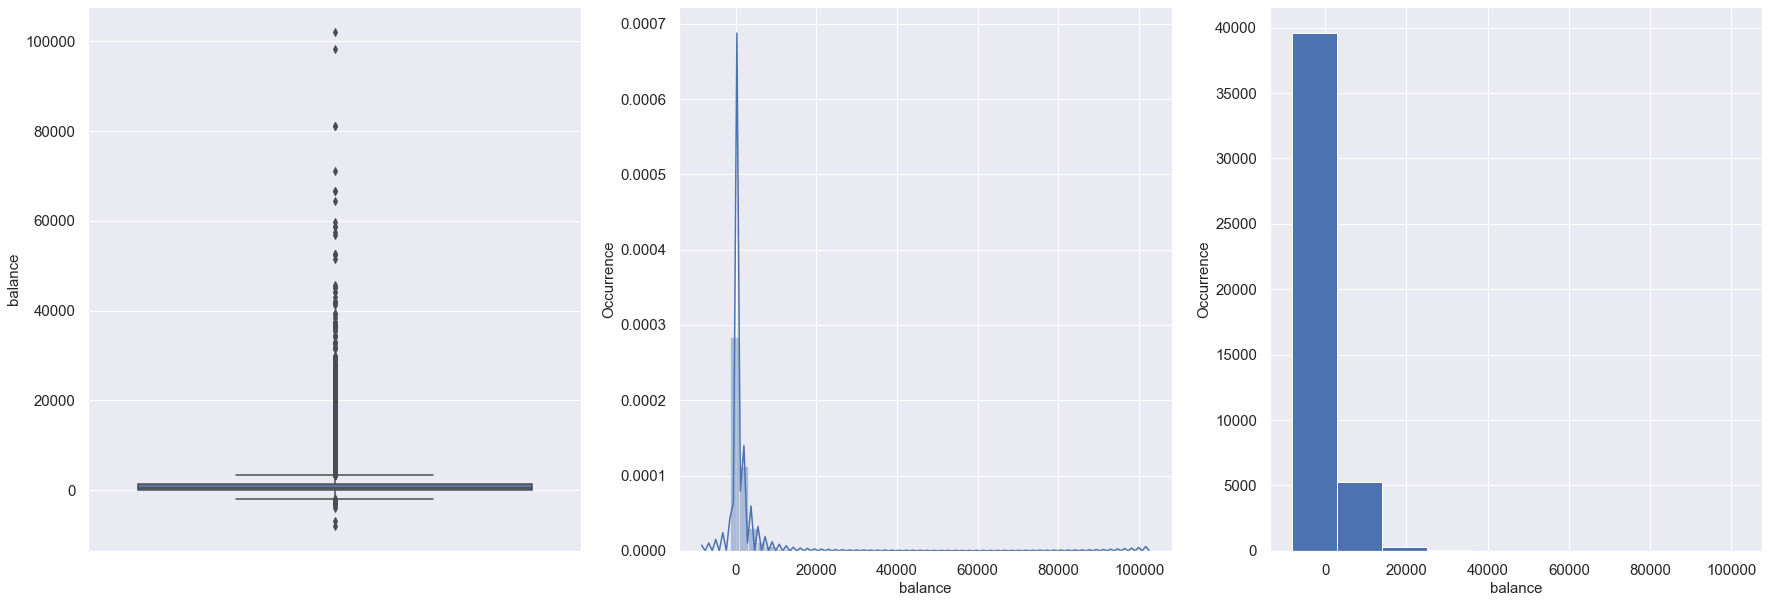

In [92]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))

#boxplot
sns.boxplot(x=col,data=data,orient='v',ax=ax1)
ax1.set_ylabel(col, fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['balance'],ax=ax2)
ax2.set_xlabel(col, fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data[col])
ax3.set_xlabel(col, fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

housing
no     20081
yes    25130
dtype: int64


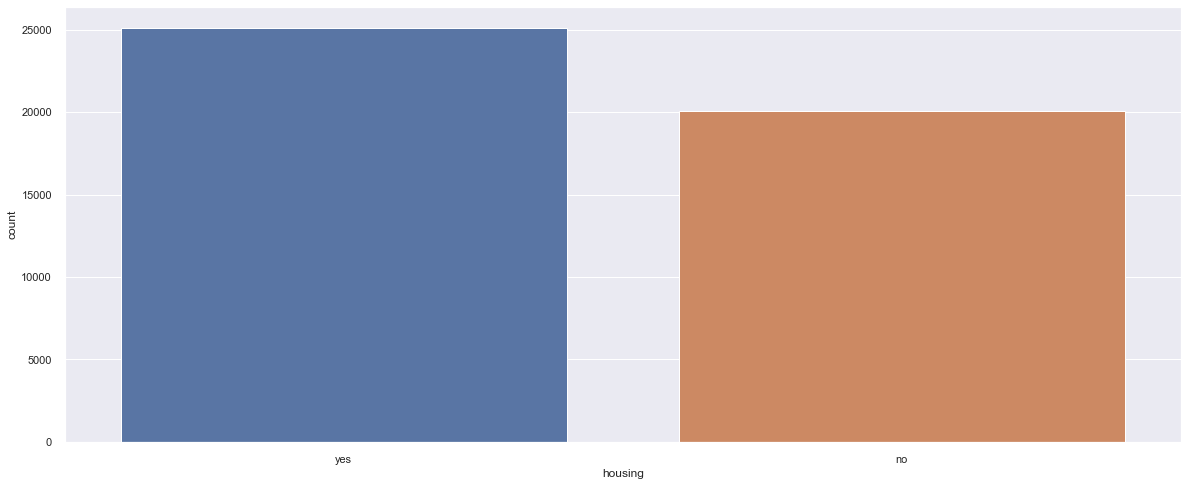

In [93]:
# Housing
# Lets see how many values does it have and how many per category
col = 'housing'
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)

loan
no     37967
yes     7244
dtype: int64


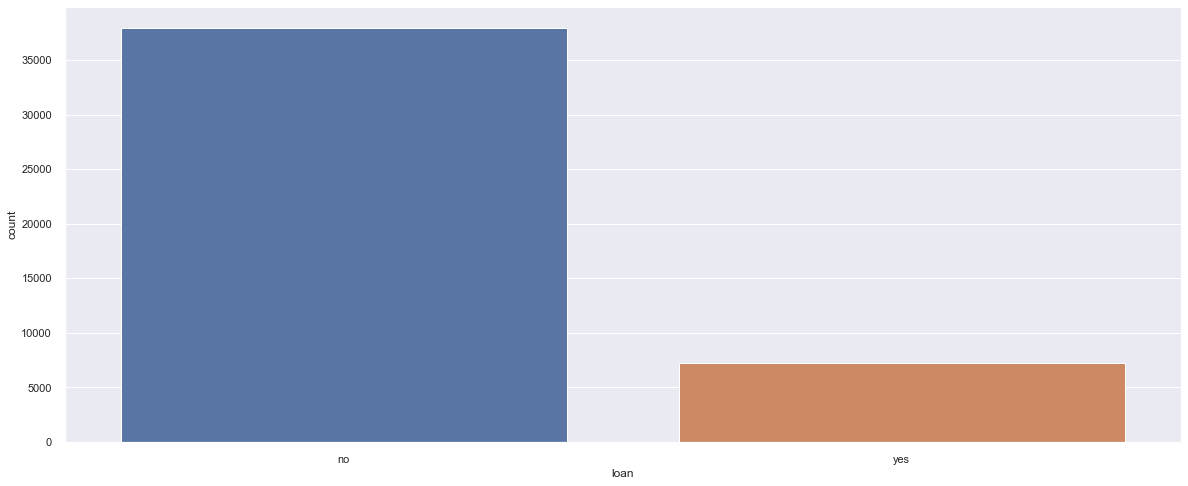

In [94]:
# Loan
# Lets see how many values does it have and how many per category
col = 'loan'
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)

contact
cellular     29285
telephone     2906
unknown      13020
dtype: int64


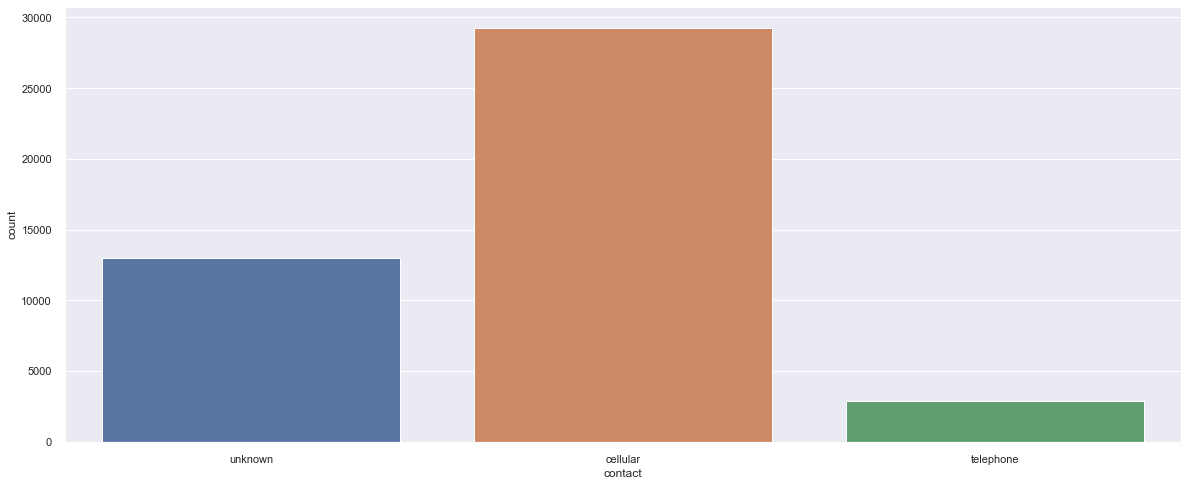

In [95]:
# Contact
# Lets see how many values does it have and how many per category
col = 'contact'
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)

contact
telephone    32191
unknown      13020
dtype: int64


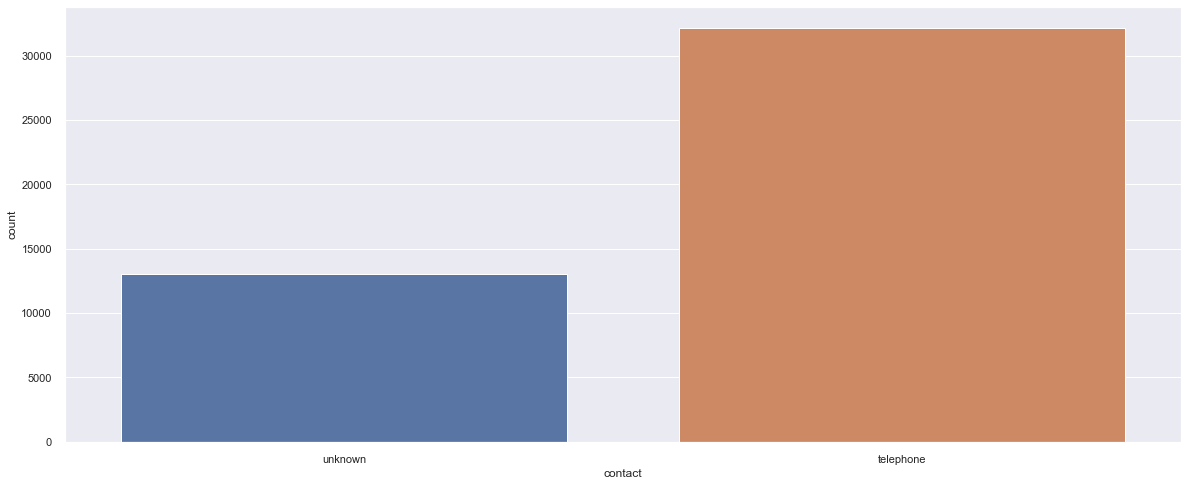

In [96]:
# Optimize classes in contact
data[col]=np.where(data[col]=='cellular','telephone',data[col])
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)


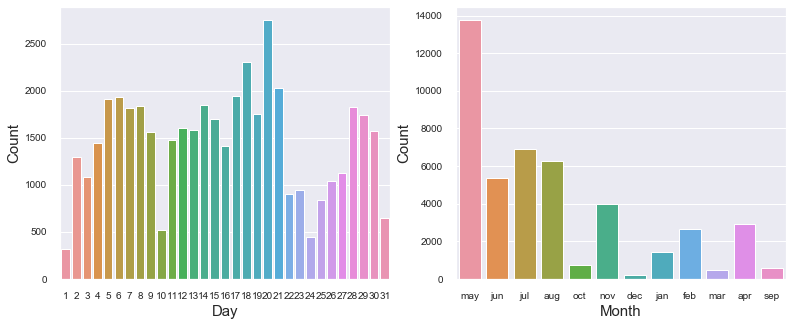

In [97]:
# Day and Month
# Number of contacts made per day and per month

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))

#countplot
sns.countplot(data['day'],data=data,ax=ax1)
ax1.set_xlabel('Day', fontsize=15)
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=10)

#distplot
sns.countplot(data['month'],data=data,ax=ax2)
ax2.set_xlabel('Month', fontsize=15)
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=10)

In [98]:
# Duration of customer contact in seconds

col = 'duration'
print('Name -------------------------:', col)
print('Minimum ----------------------:', data[col].min())
print('Maximum ----------------------:', data[col].max())
print('Mean -------------------------:', data[col].mean())
print('Median -----------------------:', data[col].median())
print('Standard Deviation -----------:', data[col].std())
q1 = data[col].quantile(q=0.25)
q3 = data[col].quantile(q=0.75)
lowerOutliers=q1-1.5*(q3-q1)
upperOutliers=q3+1.5*(q3-q1)
print('Q1 ---------------------------:', q1)
print('Q3 ---------------------------:', q3)
print('Lower Outliers ---------------:', lowerOutliers)
print('Upper Outliers ---------------:', upperOutliers)
print('Number of Upper Outliers -----:', data[data[col]>70.5][col].count())
print('Number of Lower Outliers -----:', data[data[col]<10.5][col].count())
print('Percentage of Upper Outliers -:', round(data[data[col]>70.5][col].count()*100/len(data)),'%')
print('Percentage of Lower Outliers -:', round(data[data[col]<10.5][col].count()*100/len(data)),'%')
print('Null values ------------------:', data[col].isnull().any())


Name -------------------------: duration
Minimum ----------------------: 0
Maximum ----------------------: 4918
Mean -------------------------: 258.1630797814691
Median -----------------------: 180.0
Standard Deviation -----------: 257.52781226517095
Q1 ---------------------------: 103.0
Q3 ---------------------------: 319.0
Lower Outliers ---------------: -221.0
Upper Outliers ---------------: 643.0
Number of Upper Outliers -----: 39095
Number of Lower Outliers -----: 418
Percentage of Upper Outliers -: 86.0 %
Percentage of Lower Outliers -: 1.0 %
Null values ------------------: False


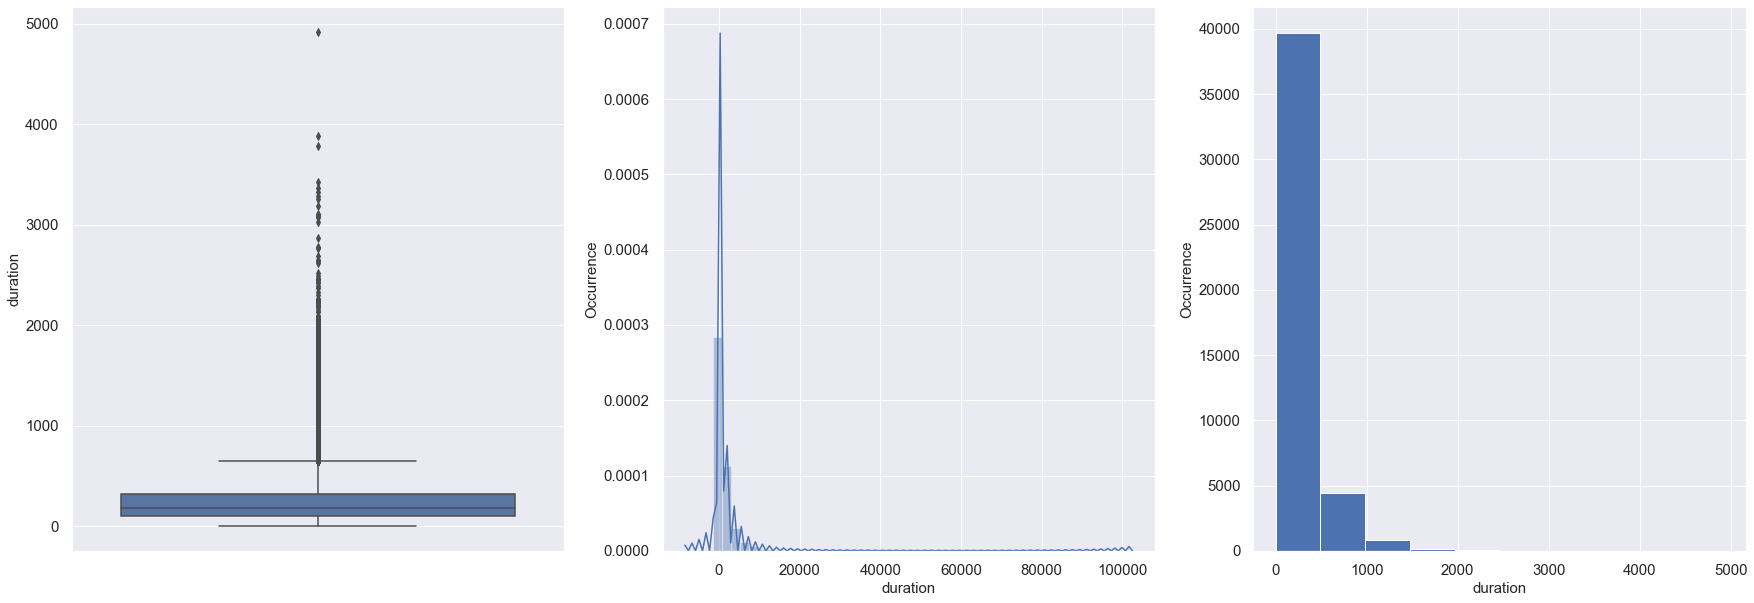

In [99]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))

#boxplot
sns.boxplot(x=col,data=data,orient='v',ax=ax1)
ax1.set_ylabel(col, fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['balance'],ax=ax2)
ax2.set_xlabel(col, fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data[col])
ax3.set_xlabel(col, fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

In [100]:
# Campaing

col = 'campaign'
print('Name -------------------------:', col)
print('Minimum ----------------------:', data[col].min())
print('Maximum ----------------------:', data[col].max())
print('Mean -------------------------:', data[col].mean())
print('Median -----------------------:', data[col].median())
print('Standard Deviation -----------:', data[col].std())
q1 = data[col].quantile(q=0.25)
q3 = data[col].quantile(q=0.75)
lowerOutliers=q1-1.5*(q3-q1)
upperOutliers=q3+1.5*(q3-q1)
print('Q1 ---------------------------:', q1)
print('Q3 ---------------------------:', q3)
print('Lower Outliers ---------------:', lowerOutliers)
print('Upper Outliers ---------------:', upperOutliers)
print('Number of Upper Outliers -----:', data[data[col]>70.5][col].count())
print('Number of Lower Outliers -----:', data[data[col]<10.5][col].count())
print('Percentage of Upper Outliers -:', round(data[data[col]>70.5][col].count()*100/len(data)),'%')
print('Percentage of Lower Outliers -:', round(data[data[col]<10.5][col].count()*100/len(data)),'%')
print('Null values ------------------:', data[col].isnull().any())

Name -------------------------: campaign
Minimum ----------------------: 1
Maximum ----------------------: 63
Mean -------------------------: 2.763840658246887
Median -----------------------: 2.0
Standard Deviation -----------: 3.0980208832802205
Q1 ---------------------------: 1.0
Q3 ---------------------------: 3.0
Lower Outliers ---------------: -2.0
Upper Outliers ---------------: 6.0
Number of Upper Outliers -----: 0
Number of Lower Outliers -----: 44015
Percentage of Upper Outliers -: 0.0 %
Percentage of Lower Outliers -: 97.0 %
Null values ------------------: False


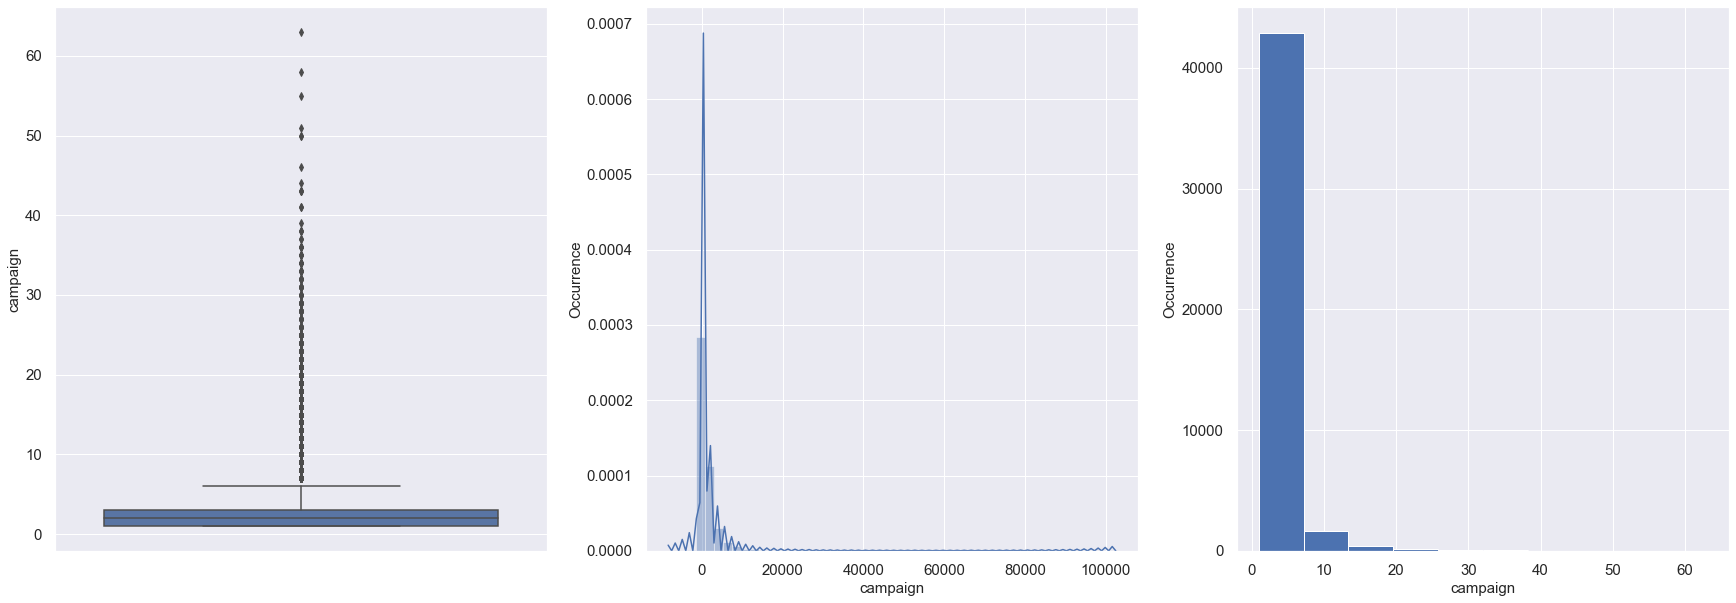

In [101]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))

#boxplot
sns.boxplot(x=col,data=data,orient='v',ax=ax1)
ax1.set_ylabel(col, fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['balance'],ax=ax2)
ax2.set_xlabel(col, fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data[col])
ax3.set_xlabel(col, fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

Name -------------------------: pdays
Minimum ----------------------: -1
Maximum ----------------------: 871
Mean -------------------------: 40.19782796222158
Median -----------------------: -1.0
Standard Deviation -----------: 100.1287459906047
Q1 ---------------------------: -1.0
Q3 ---------------------------: -1.0
Lower Outliers ---------------: -1.0
Upper Outliers ---------------: -1.0
Number of Upper Outliers -----: 7912
Number of Lower Outliers -----: 37080
Percentage of Upper Outliers -: 18.0 %
Percentage of Lower Outliers -: 82.0 %
Null values ------------------: False


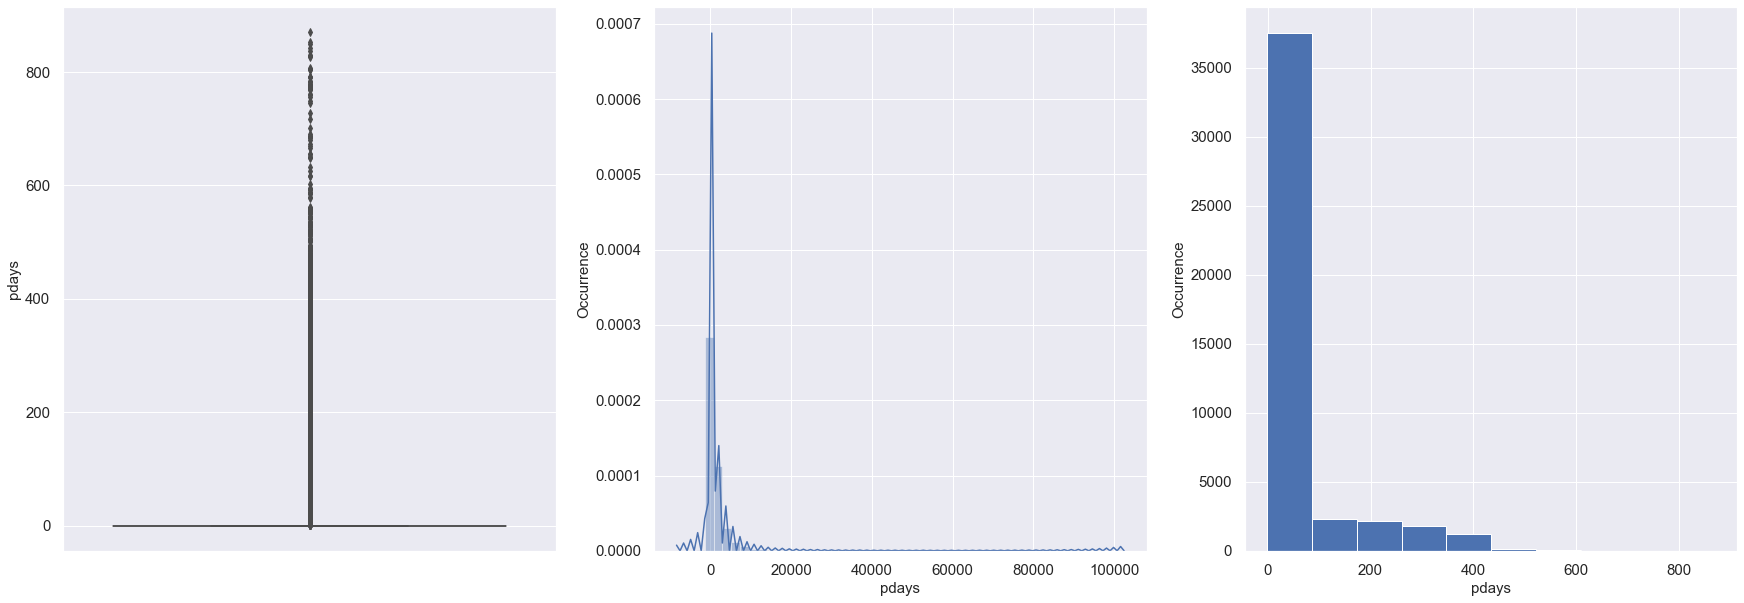

In [102]:
# pdays
col = 'pdays'
print('Name -------------------------:', col)
print('Minimum ----------------------:', data[col].min())
print('Maximum ----------------------:', data[col].max())
print('Mean -------------------------:', data[col].mean())
print('Median -----------------------:', data[col].median())
print('Standard Deviation -----------:', data[col].std())
q1 = data[col].quantile(q=0.25)
q3 = data[col].quantile(q=0.75)
lowerOutliers=q1-1.5*(q3-q1)
upperOutliers=q3+1.5*(q3-q1)
print('Q1 ---------------------------:', q1)
print('Q3 ---------------------------:', q3)
print('Lower Outliers ---------------:', lowerOutliers)
print('Upper Outliers ---------------:', upperOutliers)
print('Number of Upper Outliers -----:', data[data[col]>70.5][col].count())
print('Number of Lower Outliers -----:', data[data[col]<10.5][col].count())
print('Percentage of Upper Outliers -:', round(data[data[col]>70.5][col].count()*100/len(data)),'%')
print('Percentage of Lower Outliers -:', round(data[data[col]<10.5][col].count()*100/len(data)),'%')
print('Null values ------------------:', data[col].isnull().any())


fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))

#boxplot
sns.boxplot(x=col,data=data,orient='v',ax=ax1)
ax1.set_ylabel(col, fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['balance'],ax=ax2)
ax2.set_xlabel(col, fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data[col])
ax3.set_xlabel(col, fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

Name -------------------------: previous
Minimum ----------------------: 0
Maximum ----------------------: 275
Mean -------------------------: 0.5803233726305546
Median -----------------------: 0.0
Standard Deviation -----------: 2.3034410449314233
Q1 ---------------------------: 0.0
Q3 ---------------------------: 0.0
Lower Outliers ---------------: 0.0
Upper Outliers ---------------: 0.0
Number of Upper Outliers -----: 1
Number of Lower Outliers -----: 44917
Percentage of Upper Outliers -: 0.0 %
Percentage of Lower Outliers -: 99.0 %
Null values ------------------: False


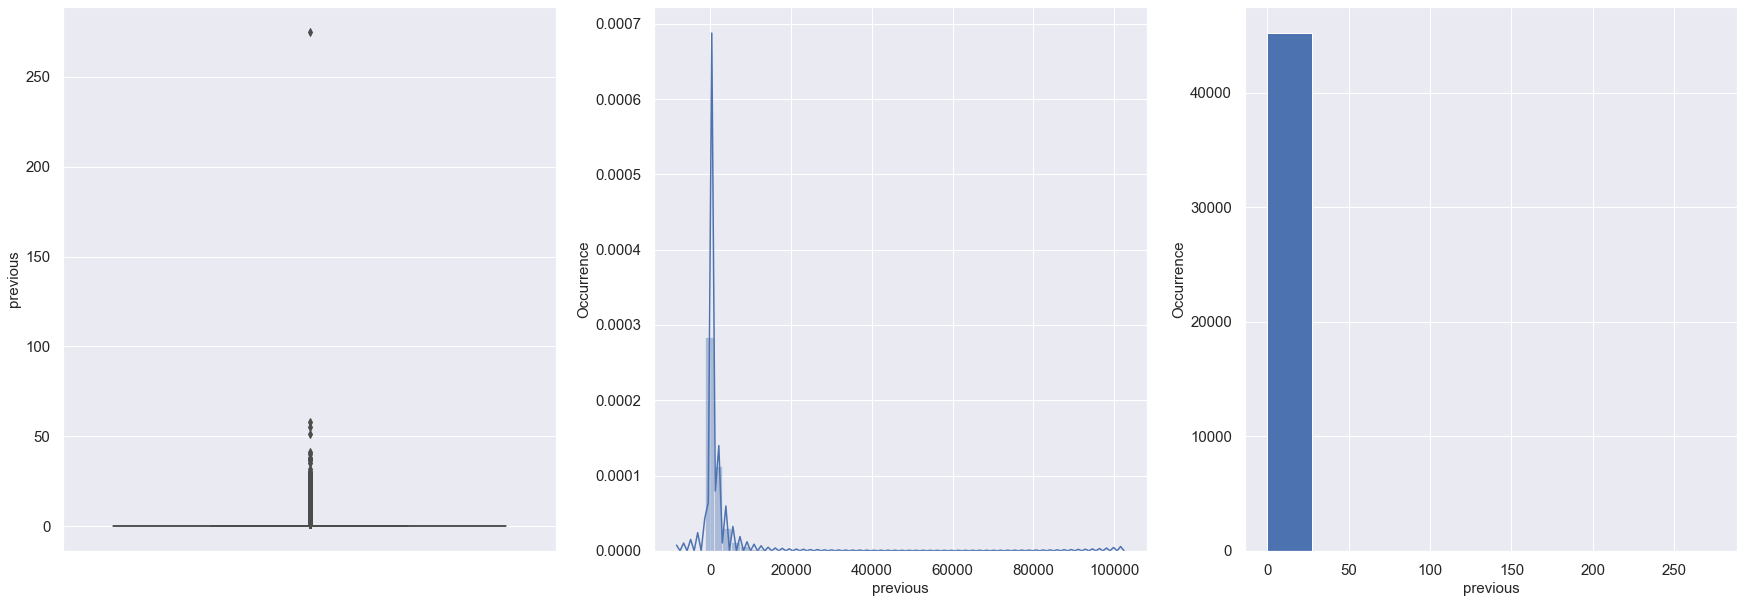

In [103]:
# Previous

col = 'previous'
print('Name -------------------------:', col)
print('Minimum ----------------------:', data[col].min())
print('Maximum ----------------------:', data[col].max())
print('Mean -------------------------:', data[col].mean())
print('Median -----------------------:', data[col].median())
print('Standard Deviation -----------:', data[col].std())
q1 = data[col].quantile(q=0.25)
q3 = data[col].quantile(q=0.75)
lowerOutliers=q1-1.5*(q3-q1)
upperOutliers=q3+1.5*(q3-q1)
print('Q1 ---------------------------:', q1)
print('Q3 ---------------------------:', q3)
print('Lower Outliers ---------------:', lowerOutliers)
print('Upper Outliers ---------------:', upperOutliers)
print('Number of Upper Outliers -----:', data[data[col]>70.5][col].count())
print('Number of Lower Outliers -----:', data[data[col]<10.5][col].count())
print('Percentage of Upper Outliers -:', round(data[data[col]>70.5][col].count()*100/len(data)),'%')
print('Percentage of Lower Outliers -:', round(data[data[col]<10.5][col].count()*100/len(data)),'%')
print('Null values ------------------:', data[col].isnull().any())



fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,10))

#boxplot
sns.boxplot(x=col,data=data,orient='v',ax=ax1)
ax1.set_ylabel(col, fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(data['balance'],ax=ax2)
ax2.set_xlabel(col, fontsize=15)
ax2.set_ylabel('Occurrence', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data[col])
ax3.set_xlabel(col, fontsize=15)
ax3.set_ylabel('Occurrence', fontsize=15)
ax3.tick_params(labelsize=15)

poutcome
failure     4901
other       1840
success     1511
unknown    36959
dtype: int64


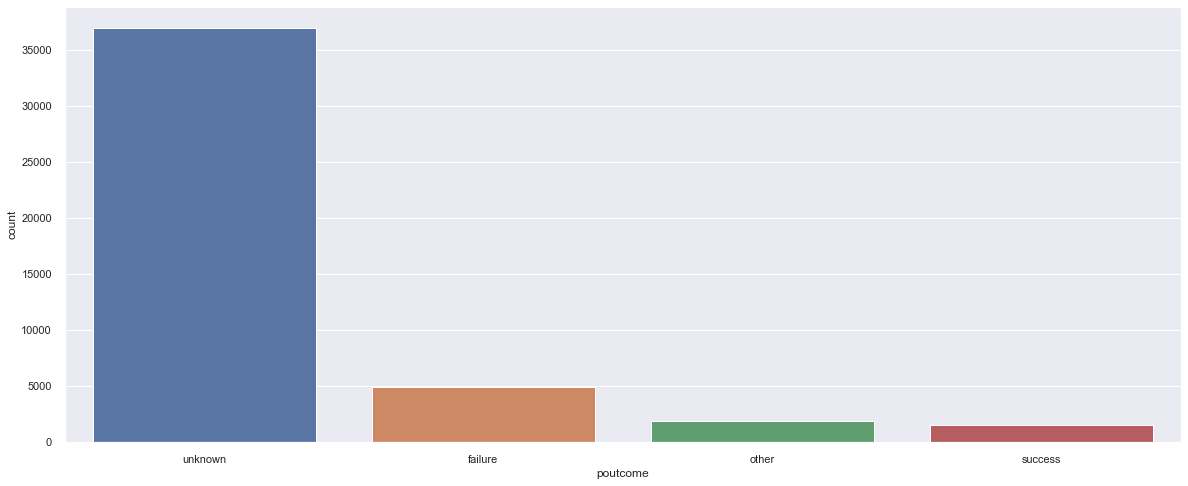

In [104]:
# POutcome
# Lets see how many values does it have and how many per category
col = 'poutcome'
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)

poutcome
failure    43700
success     1511
dtype: int64


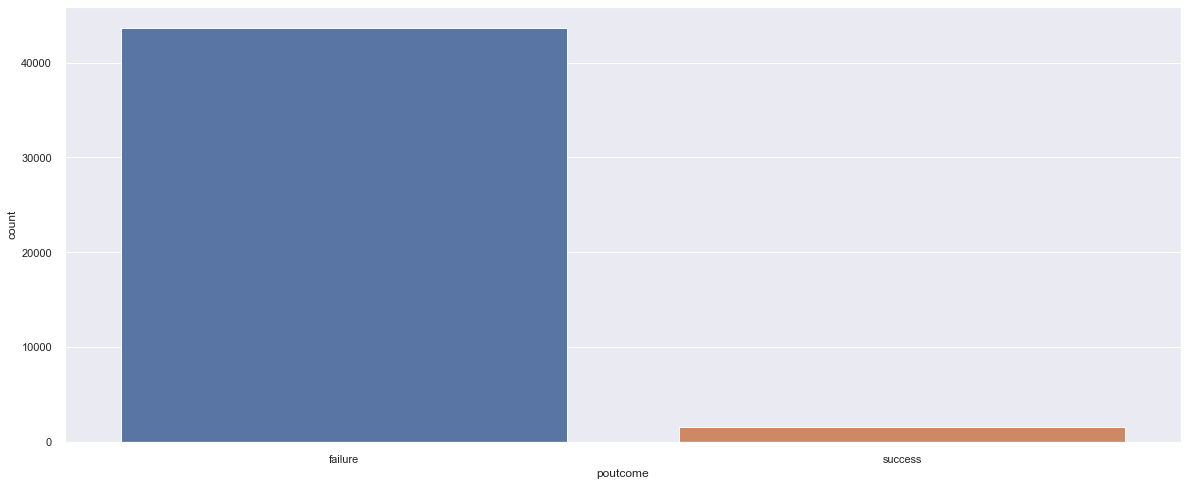

In [105]:
# Optimize classes in poutcome
# Assuming that a NO success is a failure and will need to be tried gain
data[col]=np.where(data[col]=='unknown','failure',data[col])
data[col]=np.where(data[col]=='other','failure',data[col])
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)

Target
no     39922
yes     5289
dtype: int64


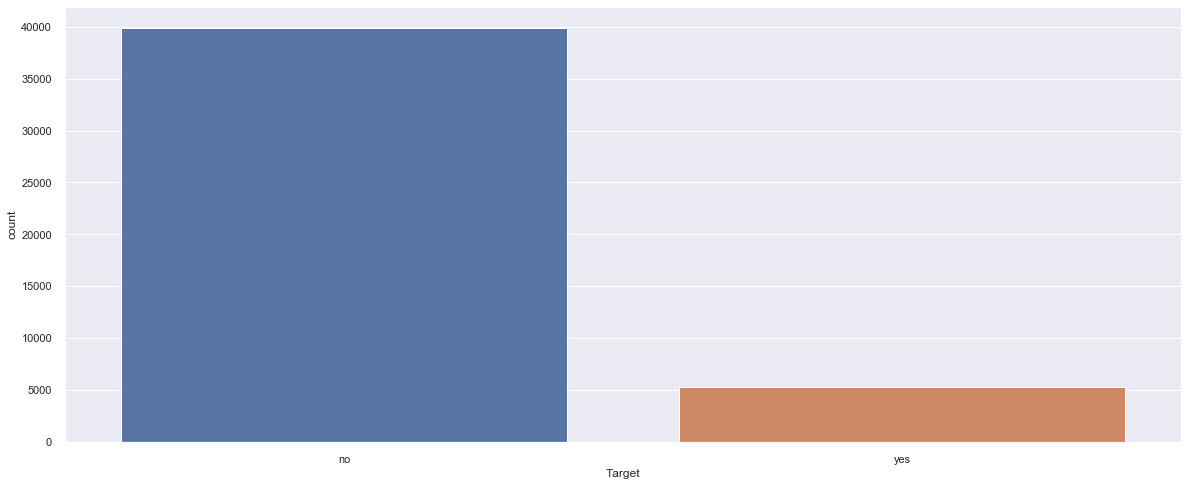

In [106]:
# Target - dependable variable

# Lets see how many values does it have and how many per category
col = 'Target'
print(data.groupby(col).size())

# Lets plot the value counts
fig, ax=plt.subplots()
fig.set_size_inches(20,8)

#countplot
sns.countplot(data[col],data=data)
ax1.set_xlabel(col, fontsize=18)
ax1.set_ylabel('Count', fontsize=18)
ax1.tick_params(labelsize=20)


In [107]:
# Converting categorical colums from object to category
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [108]:
# Value counts of all categorical columns
for i in list(data.columns[data.dtypes=='category']):   # checking value counts of all object type columns
    print(data[i].value_counts(normalize=True))
    print()

blue-collar     0.537524
white-collar    0.356462
unemployed      0.106014
Name: job, dtype: float64

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

no     0.981973
yes    0.018027
Name: default, dtype: float64

yes    0.555838
no     0.444162
Name: housing, dtype: float64

no     0.839774
yes    0.160226
Name: loan, dtype: float64

telephone    0.712017
unknown      0.287983
Name: contact, dtype: float64

may    0.304483
jul    0.152507
aug    0.138174
jun    0.118135
nov    0.087810
apr    0.064851
feb    0.058592
jan    0.031032
oct    0.016323
sep    0.012807
mar    0.010551
dec    0.004733
Name: month, dtype: float64

failure    0.966579
success    0.033421
Name: poutcome, dtype: float64

no     0.883015
yes    0.116985
Name: Target, dtype: float64



In [109]:
# Preparing data variables, etc

replaceStruct = {"month":{"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12},
                 "loan": {"no": 0, "yes": 1},
                 "housing": {"no": 0, "yes": 1},
                 "default": {"no": 0, "yes": 1},
                 "education": {"unknown": 0, "primary": 1, "secondary": 2, "tertiary": 3},
                 "Target": {"no": 0, "yes": 1 }}

data=data.replace(replaceStruct)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  int64   
 4   default    45211 non-null  int64   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int64   
 7   loan       45211 non-null  int64   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int64   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  int64   
dtypes: category(4), int64(13)
memory usage: 4.7 MB


In [111]:
# Data description
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
education,45211.0,2.060516,0.778704,0.0,2.0,2.0,3.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
month,45211.0,6.144655,2.408034,1.0,5.0,6.0,8.0,12.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0


In [112]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,white-collar,married,3,0,2143,1,0,unknown,5,5,261,1,-1,0,failure,0
1,44,blue-collar,single,2,0,29,1,0,unknown,5,5,151,1,-1,0,failure,0
2,33,white-collar,married,2,0,2,1,1,unknown,5,5,76,1,-1,0,failure,0
3,47,blue-collar,married,0,0,1506,1,0,unknown,5,5,92,1,-1,0,failure,0
4,33,unemployed,single,0,0,1,0,0,unknown,5,5,198,1,-1,0,failure,0


In [113]:
data.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,blue-collar,married,3,0,825,0,0,telephone,17,11,977,3,-1,0,failure,1
45207,71,unemployed,divorced,1,0,1729,0,0,telephone,17,11,456,2,-1,0,failure,1
45208,72,unemployed,married,2,0,5715,0,0,telephone,17,11,1127,5,184,3,success,1
45209,57,blue-collar,married,2,0,668,0,0,telephone,17,11,508,4,-1,0,failure,0
45210,37,white-collar,married,2,0,2971,0,0,telephone,17,11,361,2,188,11,failure,0


##### 2. Multivariate analysis (8 marks)

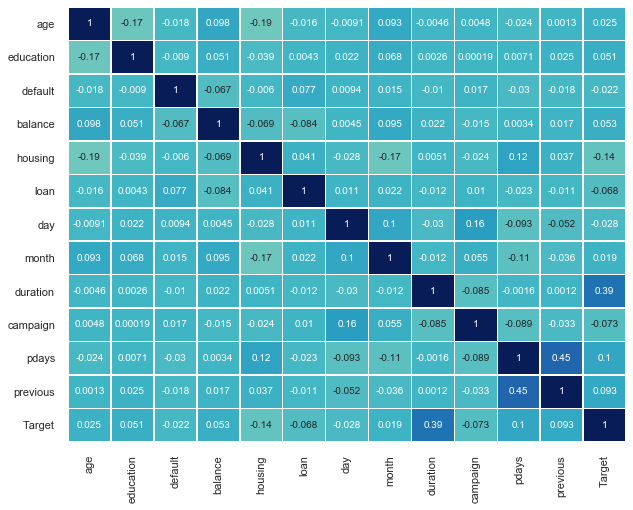

In [114]:
# Correlation heatmap

# Plotting correlation
plt.figure(figsize=(10,8))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

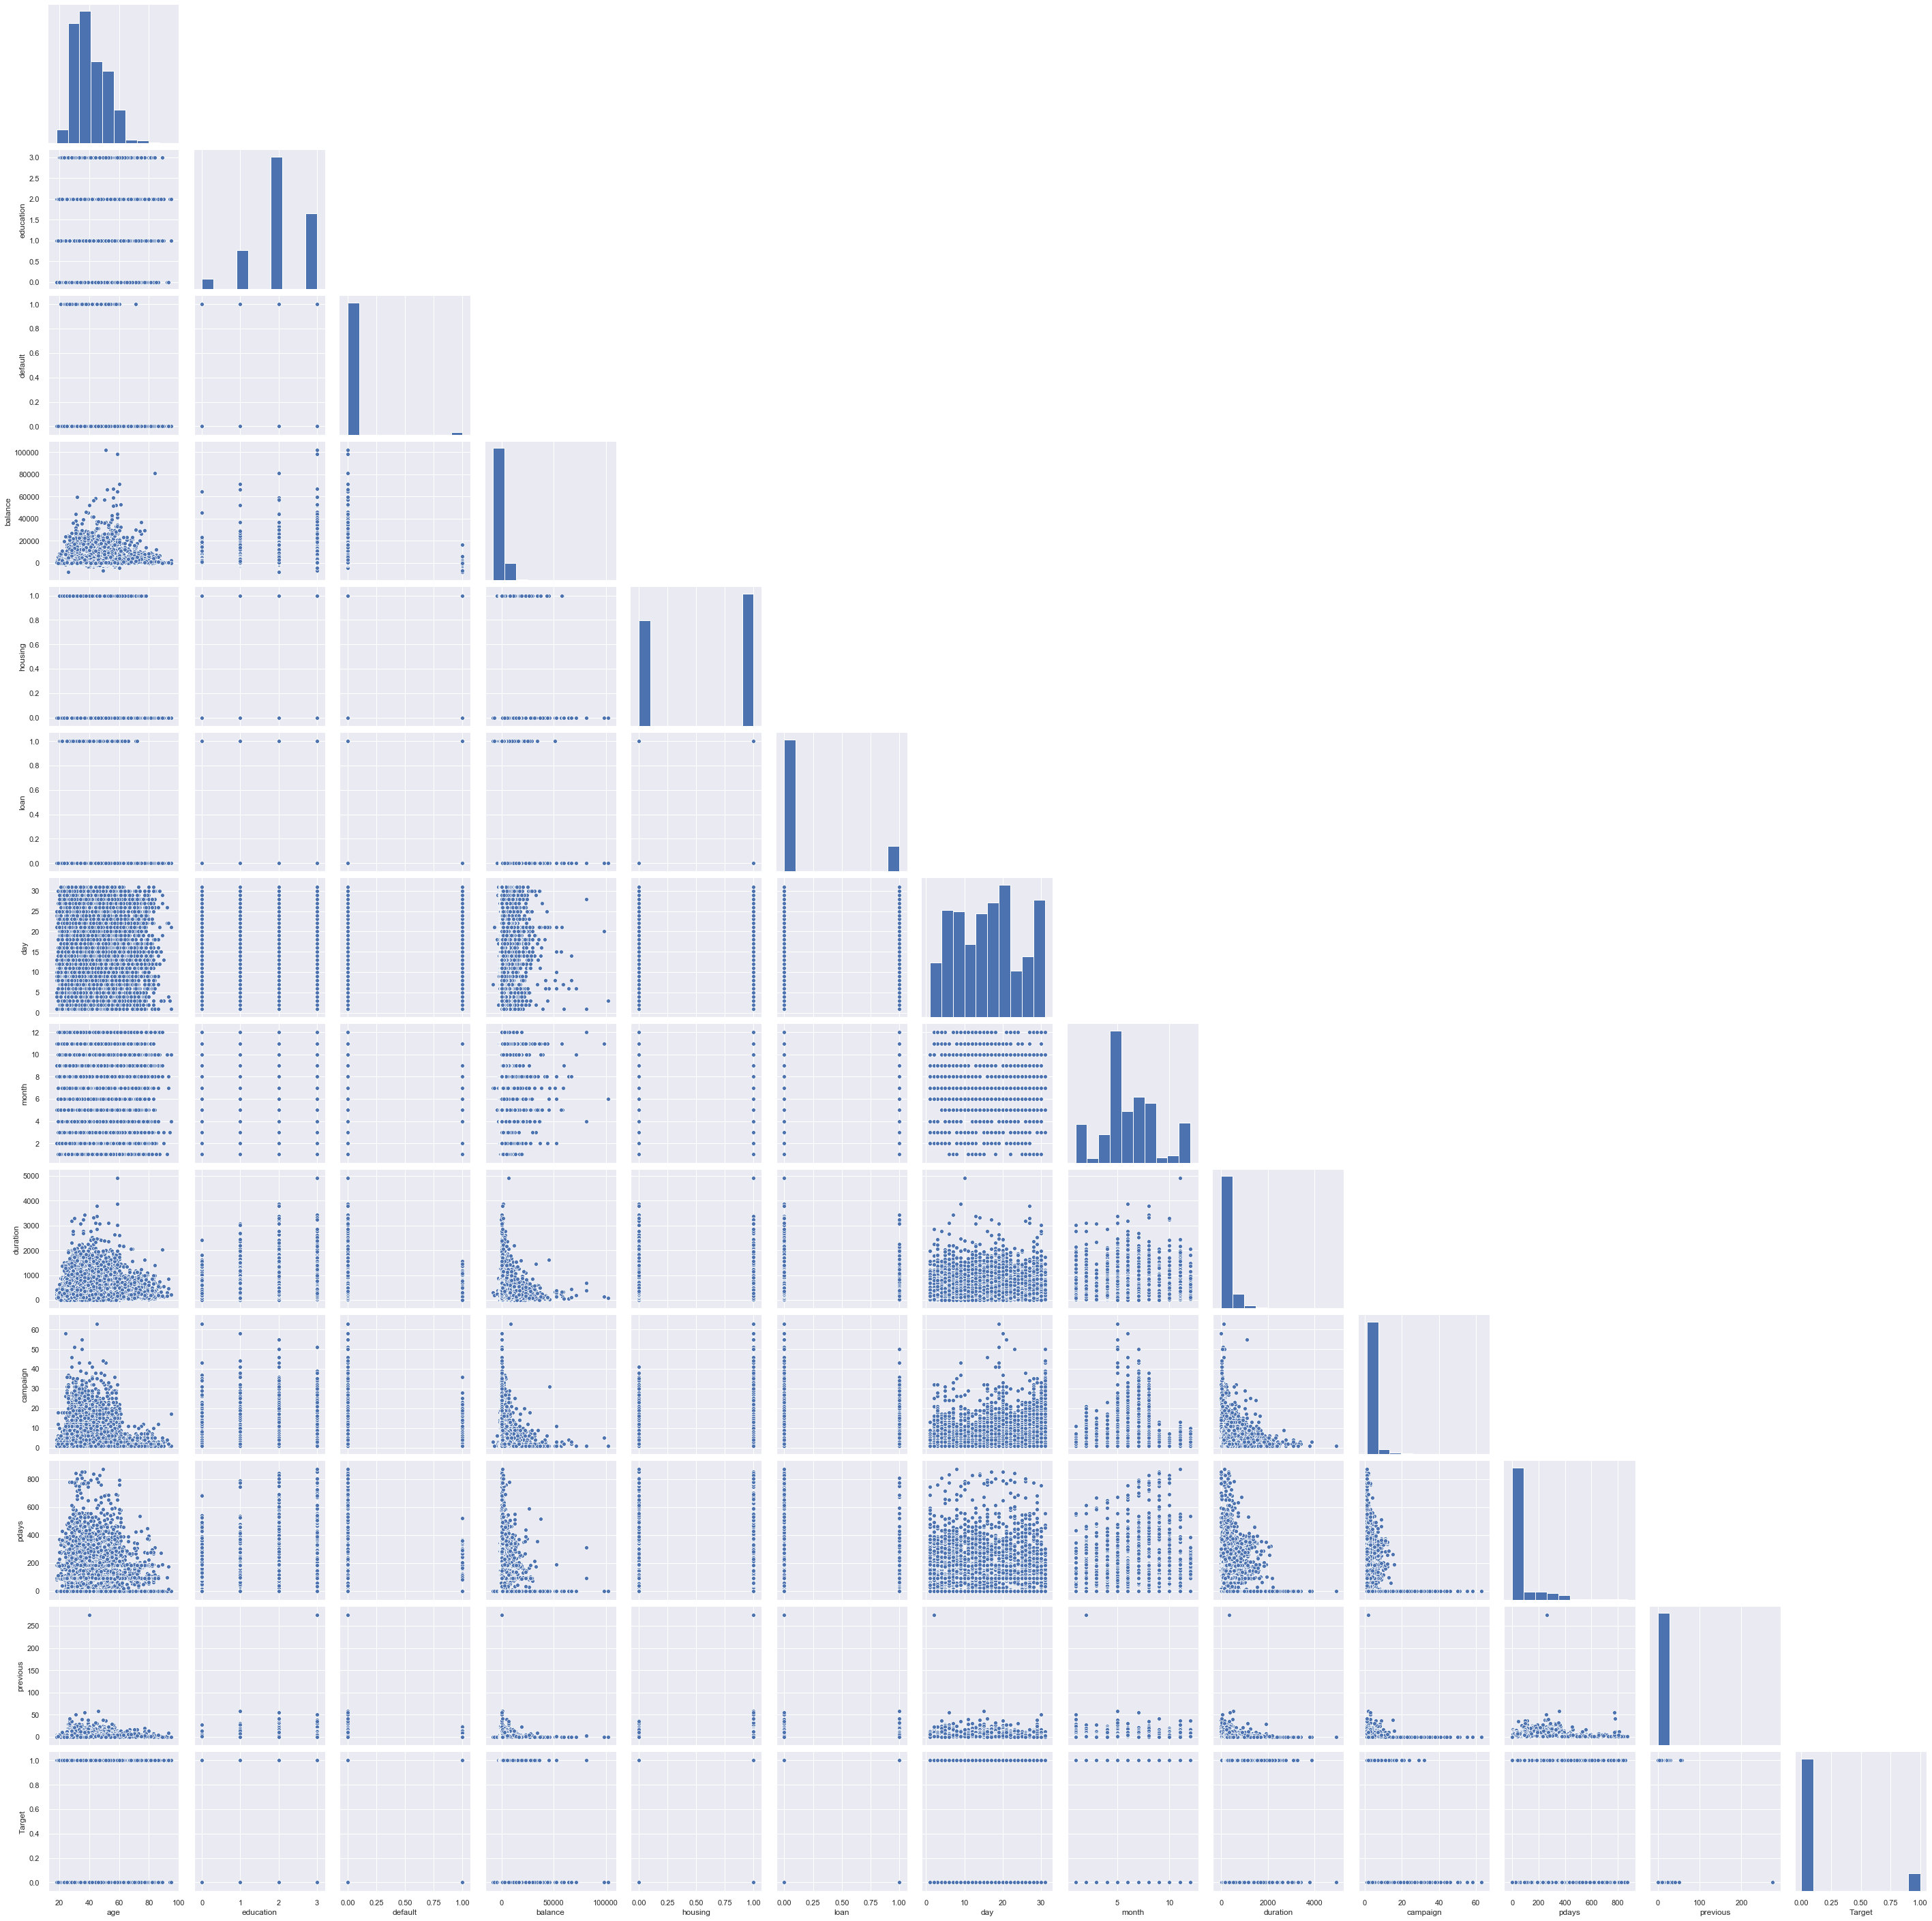

In [115]:
# Pairplot for further visualization
sns.pairplot(data, height=3, diag_kind='auto', corner=True)
plt.show()

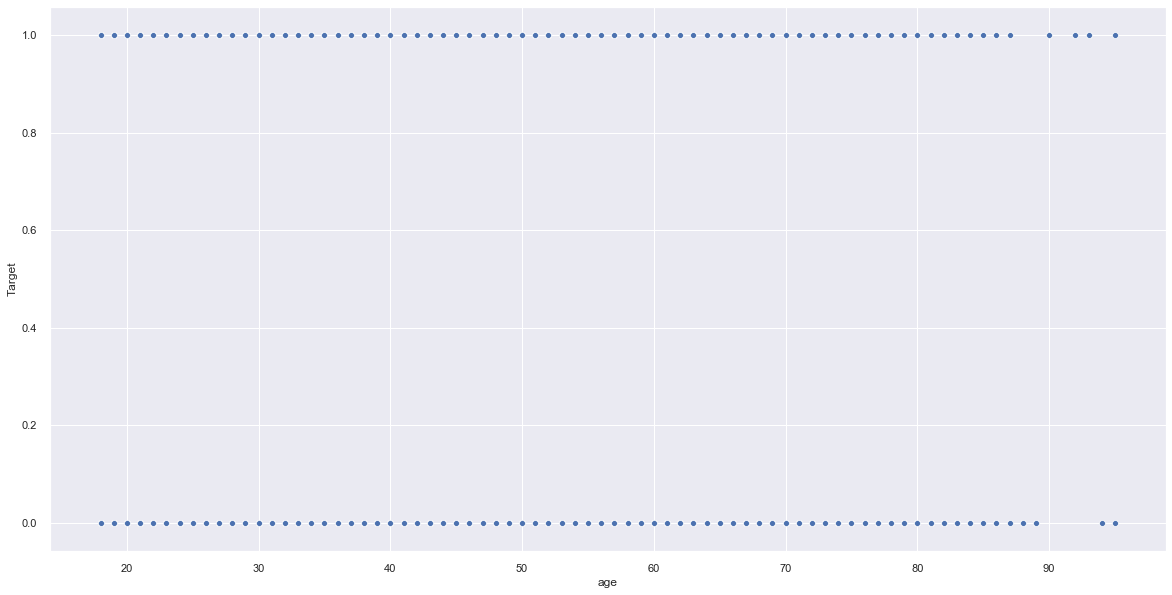

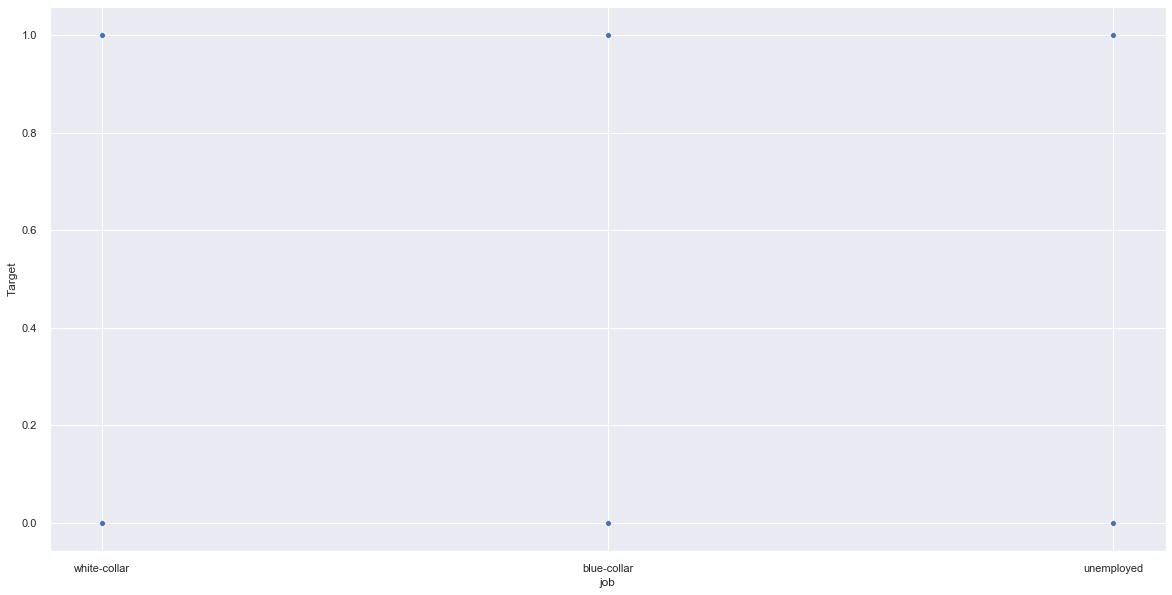

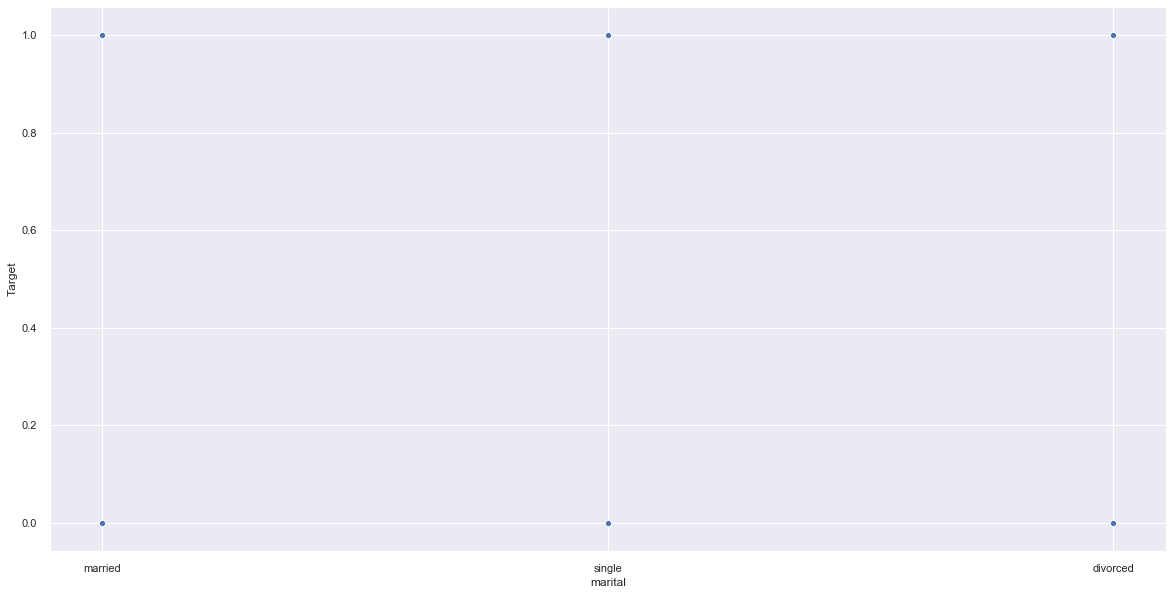

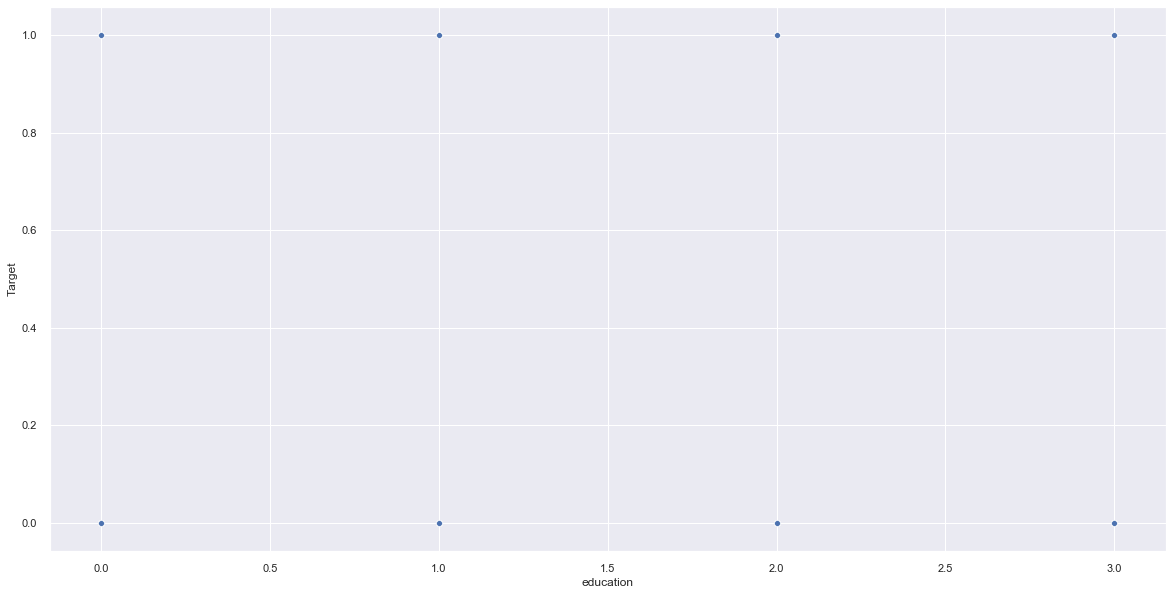

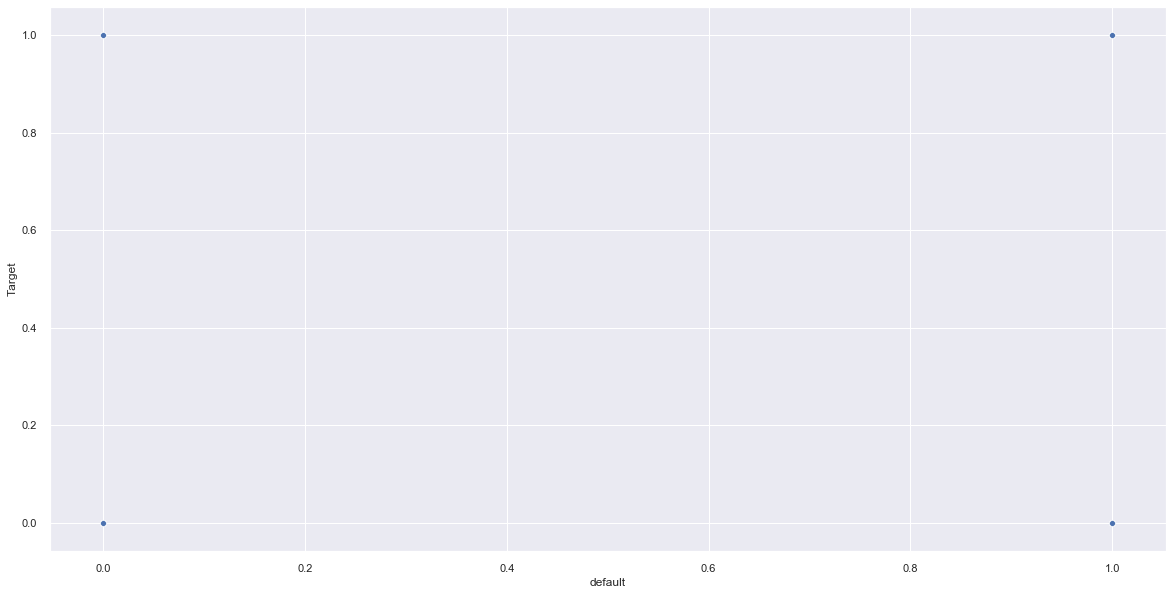

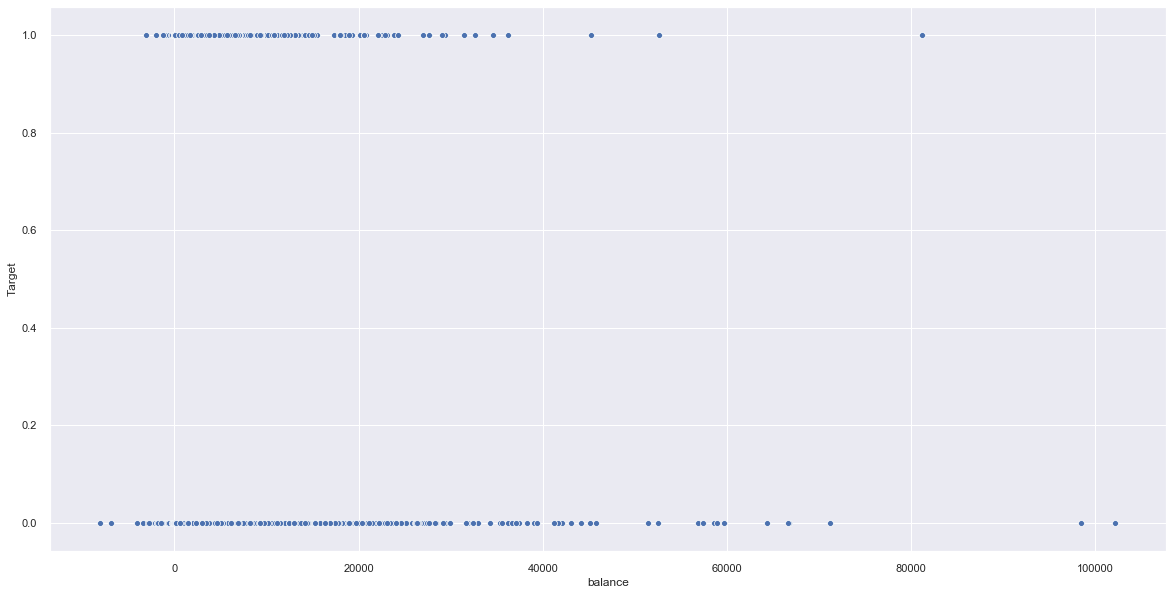

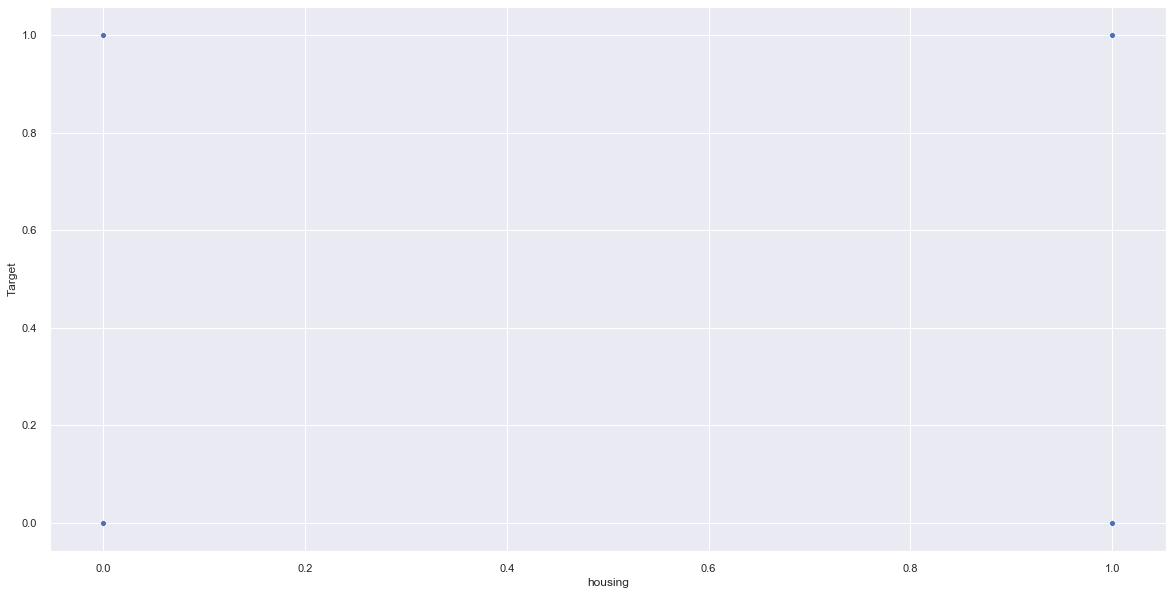

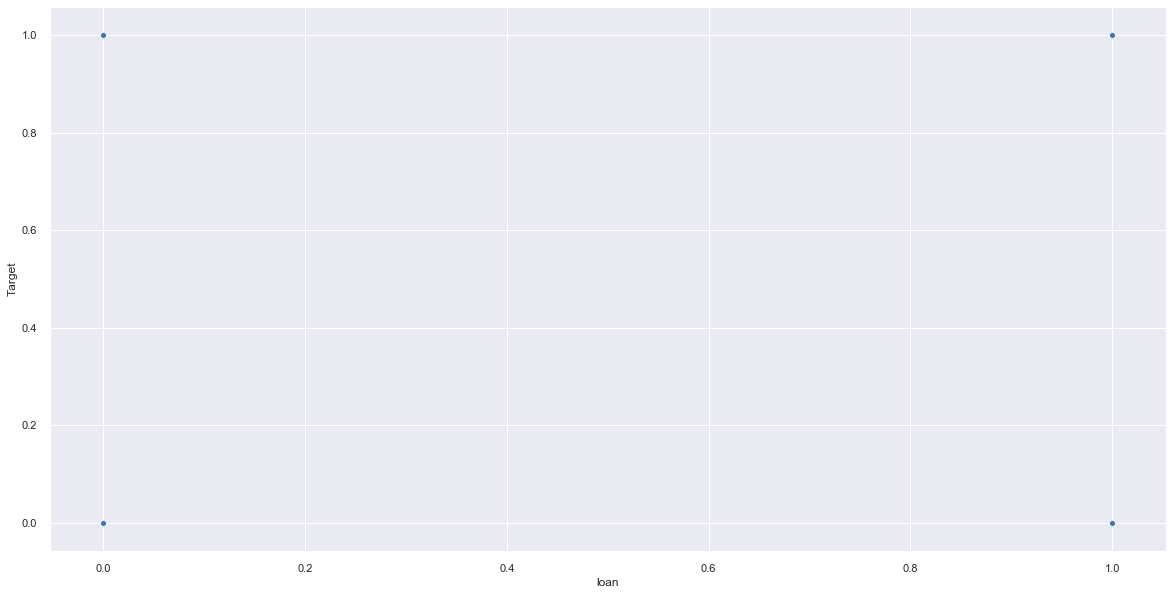

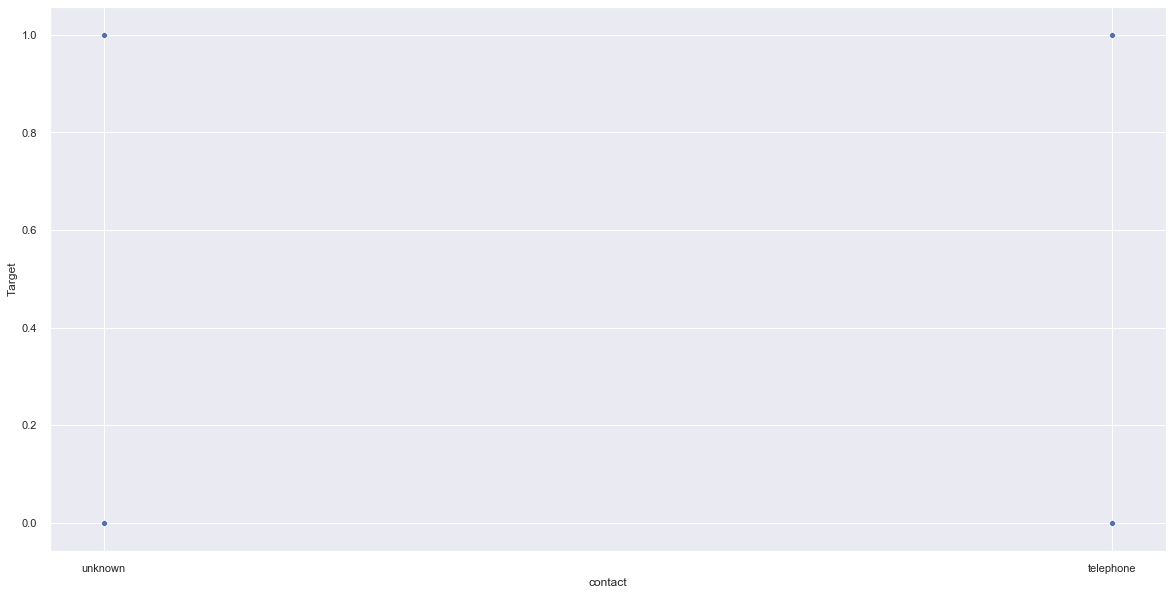

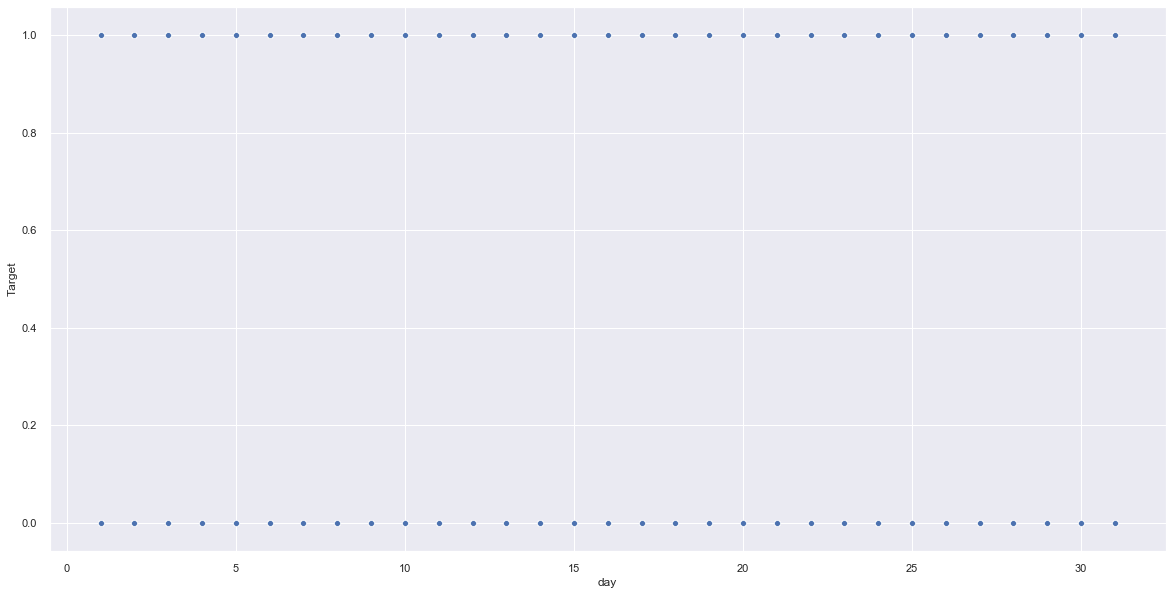

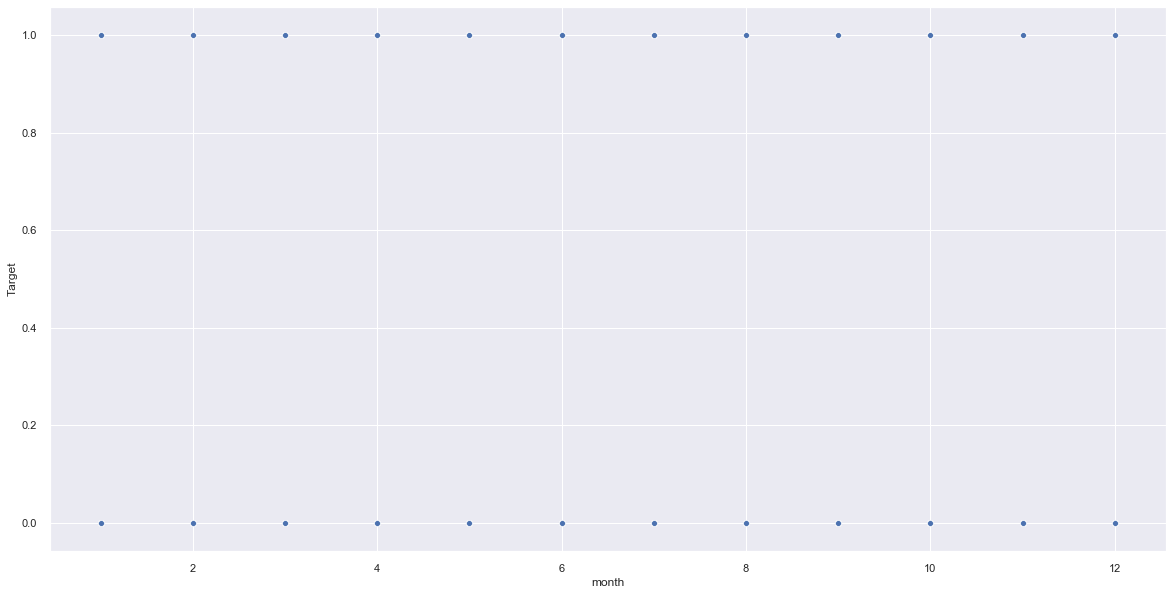

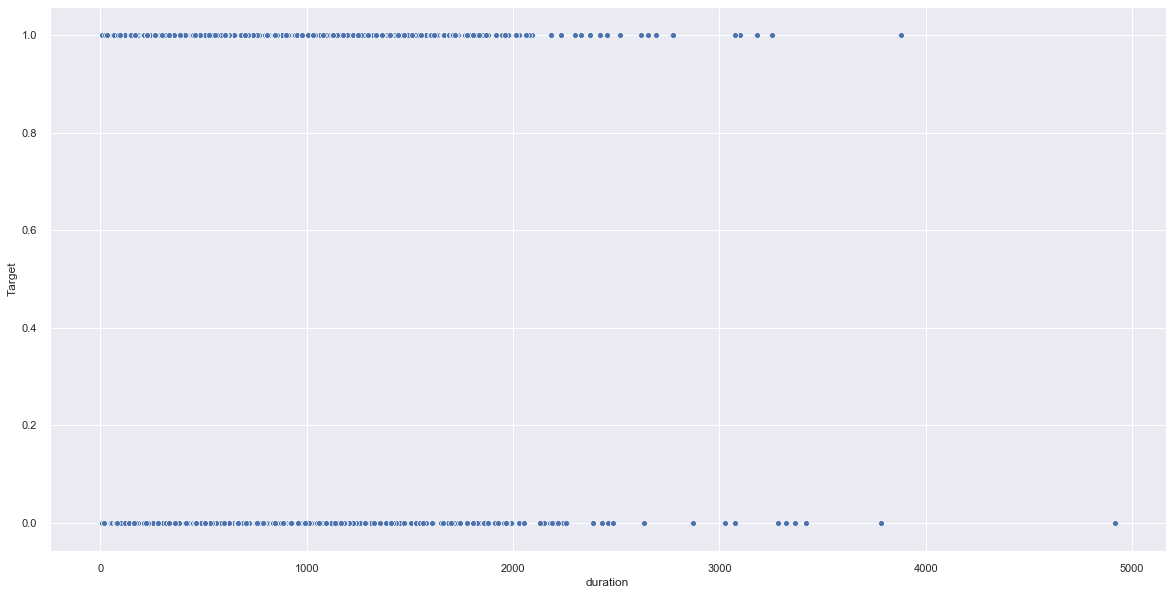

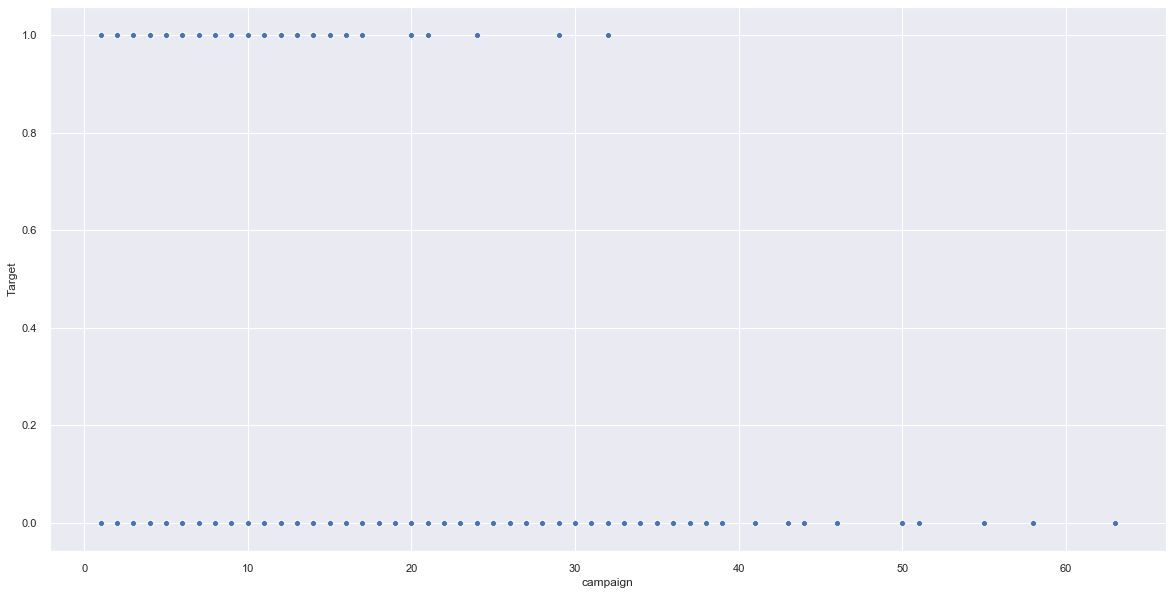

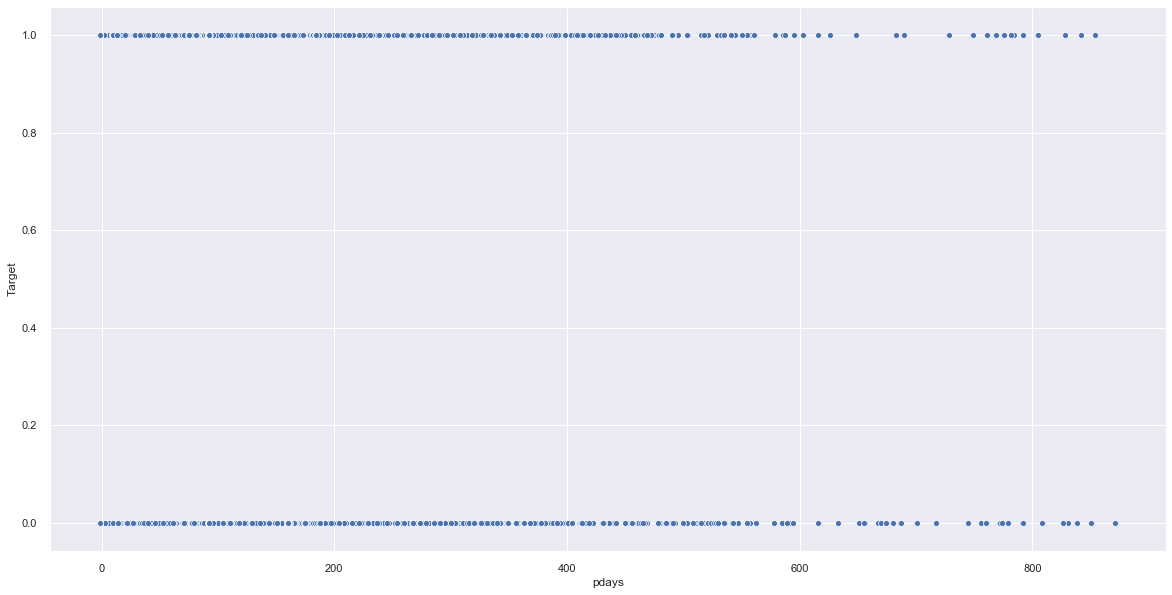

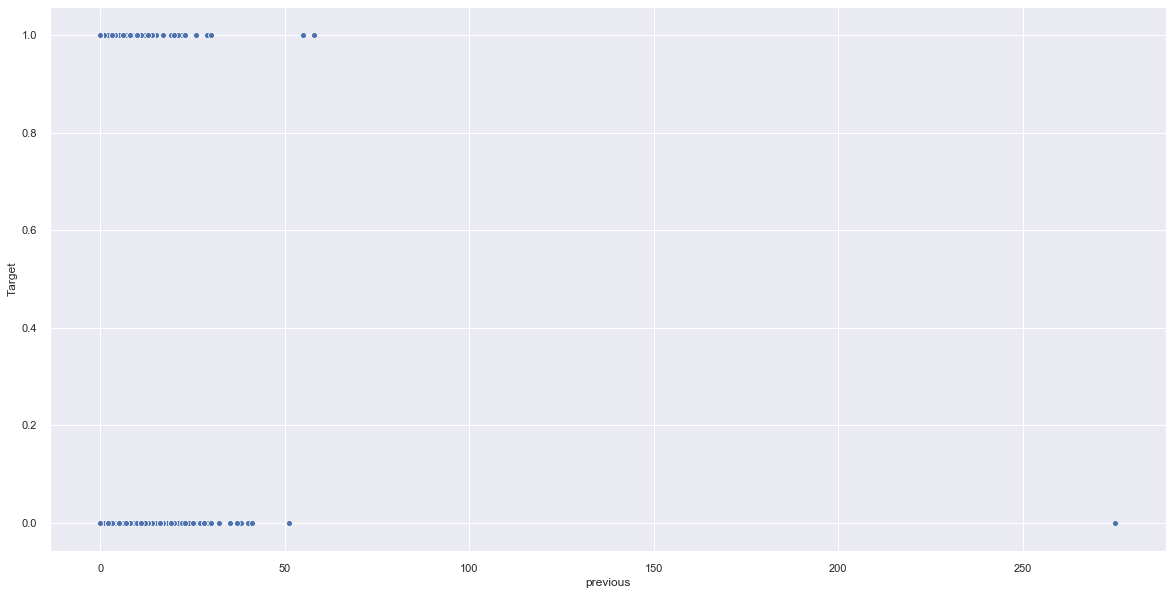

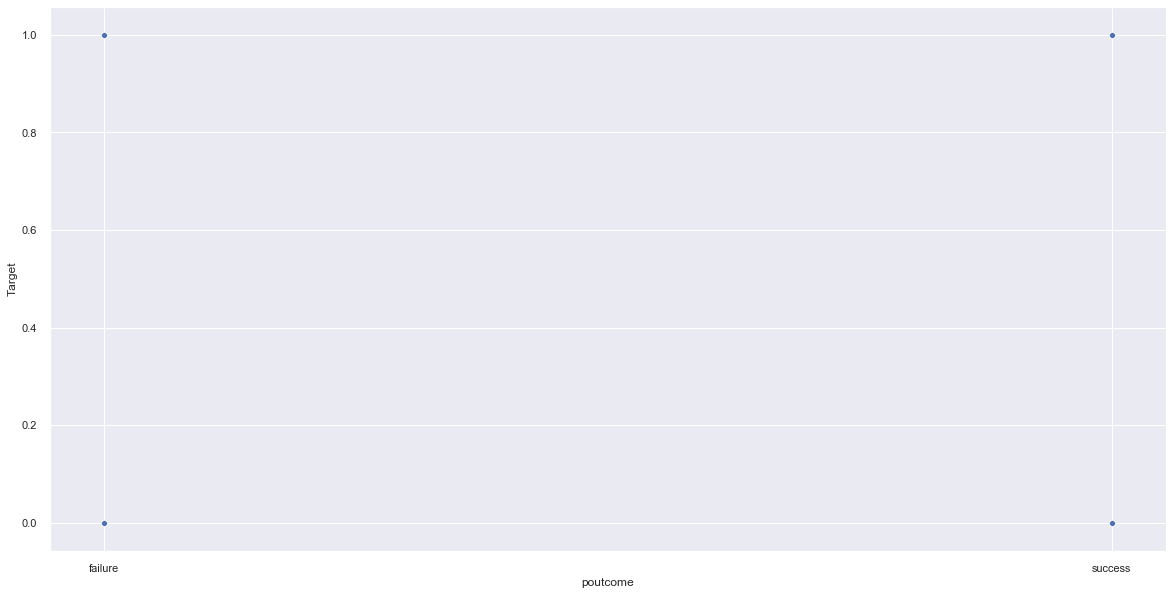

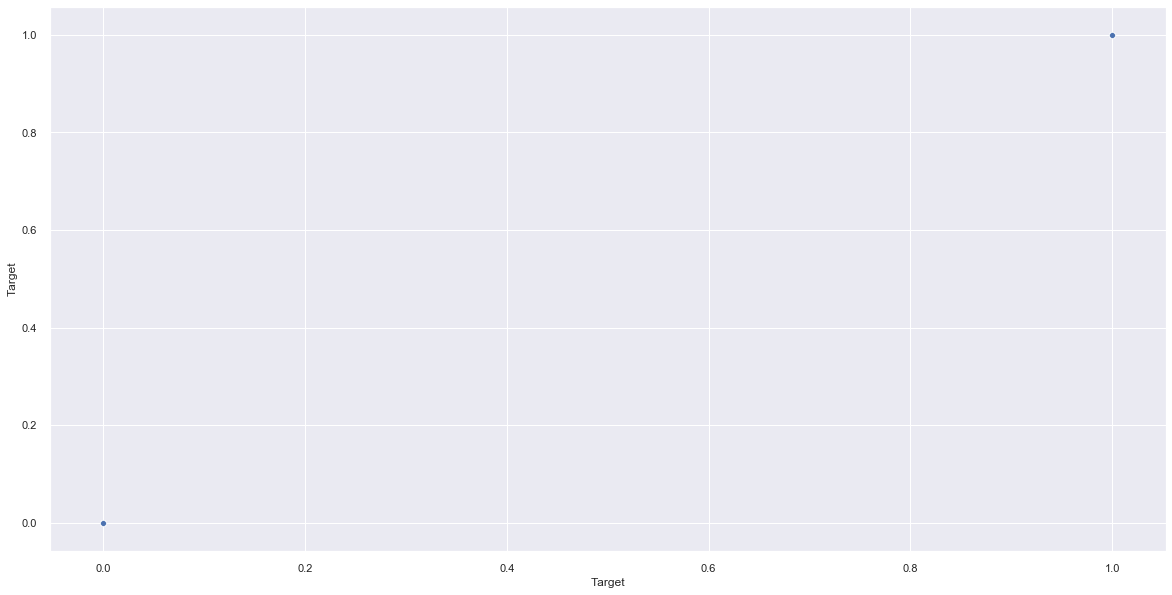

In [116]:
# Scatterplot showing the relationships between independet variables and the dependent variable 'Personal Loan'
for i in data.columns:
    plt.figure(figsize=(20,10))
    sns.scatterplot(x = data[i], y = data['Target'])
    plt.show()

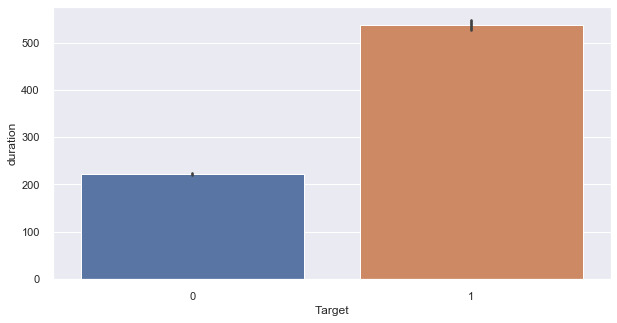

In [117]:
# Duration Vs Target
fig, ax1=plt.subplots(1,1,figsize=(10,5))

#barplot
sns.barplot(x="Target", y="duration", data=data,ax=ax1)
plt.show()


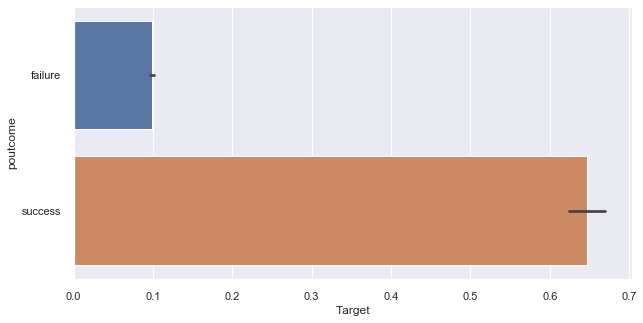

In [118]:
# POutcome vs Target

fig, ax1=plt.subplots(1,1,figsize=(10,5))

#barplot
sns.barplot(x="Target", y="poutcome", data=data,ax=ax1)


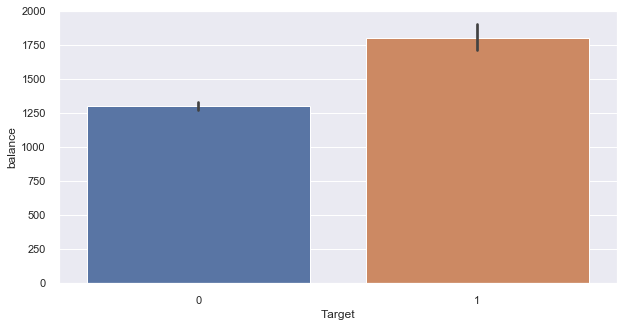

In [119]:
# Balance vs Target

fig, ax1=plt.subplots(1,1,figsize=(10,5))

#barplot
sns.barplot(x="Target", y="balance", data=data,ax=ax1)


#### Deliverable - 2.  Prepare data for analisys

In [120]:
# Several steps to prepare the data for analisys have been completed in previous steps
# We still need to do some one hot encoding and split the data in train/test groups

oneHotCols=["job","marital","contact","poutcome"]
data=pd.get_dummies(data, columns=oneHotCols)

X = data.drop("Target" , axis=1)
y = data.pop("Target")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
columns=X_train.columns

#### Deliverable - 3.  Create the Ensemble Model


In [121]:
# Logistic Regresion
logreg = LogisticRegression(random_state=7)
logreg.fit(X_train, y_train)                    # fit the model on train data
y_predict = logreg.predict(X_test)              # Predicting the target variable on test data


In [122]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8894681960375391

Testing accuracy 0.8902241226776763

Confusion Matrix


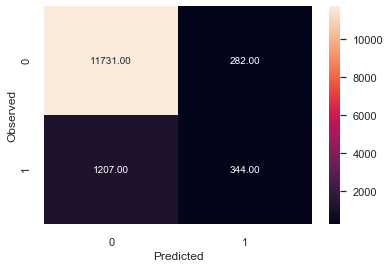

None

Recall: 0.22179239200515796

Precision: 0.549520766773163

F1 Score: 0.31603123564538355

Roc Auc Score: 0.5991589113942379


In [123]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

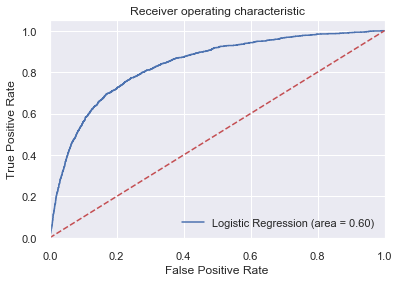

In [124]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [125]:
# Will try to tune those parameters to see how they affect the model performce or not
# First is to test differnt solvers

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.9, 0.889, 0.9, 0.882, 0.882]

[0.9, 0.89, 0.901, 0.886, 0.885]


In [126]:
# Let's try now with a penalty of 11

train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.9, 0.882]

[0.9, 0.885]


In [127]:
# Let's try now with changing class weight to balanced

train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', solver=i, class_weight='balanced')  
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.831, 0.303]

[0.829, 0.3]


In [128]:
# Based on previous runs I'm selecting newton-cg with penalty=12 for my model

model = LogisticRegression(random_state=42,penalty='l2',solver='newton-cg')

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9000537175719657

Testing accuracy 0.9003243880861103


In [129]:
# I will now run a loop to check different values of 'C'. Default is 1.0

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.899, 0.9, 0.9, 0.9, 0.9, 0.9]

[0.9, 0.9, 0.9, 0.9, 0.9, 0.9]


Trainig accuracy 0.9000537175719657

Testing accuracy 0.9003243880861103

Confusion Matrix


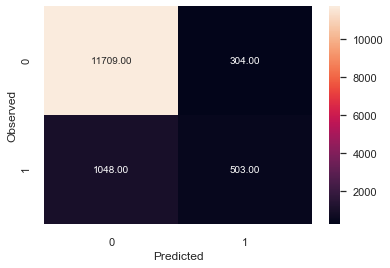

None

Recall: 0.32430689877498386

Precision: 0.6232961586121437

F1 Score: 0.42663273960983883

Roc Auc Score: 0.6495004900933938


In [130]:
# Best C the default, as seen from the logreg.get_params(), is 1.0

#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l2', solver='newton-cg', C=1.0) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

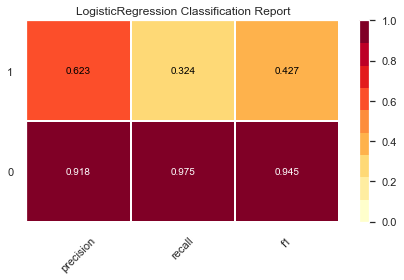

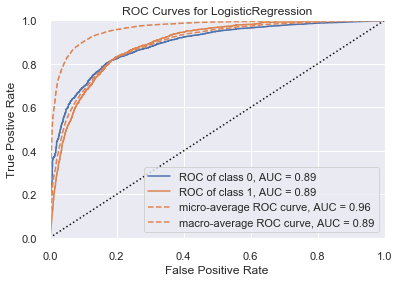

In [131]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

#Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [132]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Loggistic Regression'],'Accuracy': model.score(X_test, y_test)},index={'1'})
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Loggistic Regression,0.900324


In [133]:
# Preparing data for emsemble techniques

# Normalization/Managing imbalances

# Normalization
scaler=StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Managing imbalances
Ov_sampling=SMOTE(random_state=100)
ov_data_X,ov_data_y=Ov_sampling.fit_sample(X_train,y_train)
ov_data_X=pd.DataFrame(data=ov_data_X,columns=columns)
ov_data_y=pd.DataFrame(ov_data_y,columns=['Target'])

print('Length of oversampled data: ',len(ov_data_X))
print('Number of no subscription in oversampled data:' ,len(ov_data_y[ov_data_y['Target']==0]))
print('Number of subscription:' ,len(ov_data_y[ov_data_y['Target']==1]))
print('Proportion of no subscription data in oversampled data is:' ,len(ov_data_y[ov_data_y['Target']==0])/len(ov_data_X))
print('Proportion of subscription data in oversampled data is:' ,len(ov_data_y[ov_data_y['Target']==1])/len(ov_data_X))

ov_data_y['Target'].value_counts()

Length of oversampled data:  55818
Number of no subscription in oversampled data: 27909
Number of subscription: 27909
Proportion of no subscription data in oversampled data is: 0.5
Proportion of subscription data in oversampled data is: 0.5


1    27909
0    27909
Name: Target, dtype: int64

In [134]:
# Decision Tree Algorithm 

# invoking the decision tree classifier function. Using 'entropy' method of finding the split columns. 
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(ov_data_X,ov_data_y)

print("Train: %.2f" % dt.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % dt.score(X_test, y_test))  # performance on test data



Train: 1.00
Test: 0.87


In [135]:
#Evaluate the model using accuracy, confusion matrix, and classification report
acc_DT = accuracy_score(y_test, y_predict)

print('Accuracy DT: ',acc_DT)
print('Confusion Matrix DT: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report DT: \n',metrics.classification_report(y_test, y_predict))

Accuracy DT:  0.9003243880861103
Confusion Matrix DT: 
 [[11709   304]
 [ 1048   503]]
Classification report DT: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.62      0.32      0.43      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



In [136]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Accuracy': acc_DT},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Loggistic Regression,0.900324
2,Decision Tree,0.900324


In [137]:
# Previous tree is overfitting train data. Will prune using max_depth=3

dtPruned = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtPruned.fit(ov_data_X,ov_data_y)

print("Train: %.2f" % dtPruned.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % dtPruned.score(X_test, y_test))  # performance on test data


Train: 0.67
Test: 0.67


In [138]:
#Evaluate the model using accuracy, confusion metrix, and classification report
acc_pruned_DT = accuracy_score(y_test, y_predict)

print('Accuracy Pruned DT: ',acc_pruned_DT)
print('Confusion Matrix DT: \n',metrics.confusion_matrix(y_test, y_predict))
print('Classification report DT: \n',metrics.classification_report(y_test, y_predict))

Accuracy Pruned DT:  0.9003243880861103
Confusion Matrix DT: 
 [[11709   304]
 [ 1048   503]]
Classification report DT: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.62      0.32      0.43      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564



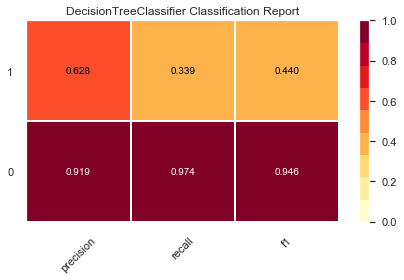

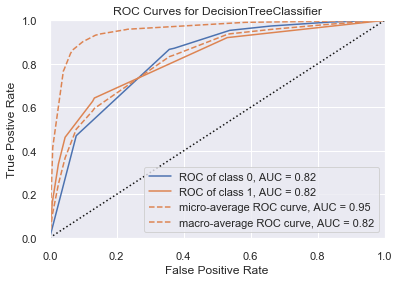

In [139]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=3))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=3))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [140]:
## Calculating feature importance
features = [col for col in data.columns if col != 'Target']
feat_importance = dtPruned.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, dtPruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
duration,0.779032
contact_unknown,0.184046
month,0.036922
age,0.000000
job_blue-collar,0.000000
poutcome_failure,0.000000
contact_telephone,0.000000
marital_single,0.000000
marital_married,0.000000
marital_divorced,0.000000


In [141]:
# duration seems to be the features (col) of most importance when creating the tree 

In [142]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'Accuracy': acc_pruned_DT},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Loggistic Regression,0.900324
2,Decision Tree,0.900324
3,Pruned Decision Tree,0.900324


In [143]:
# Ramdom Forrest
rfcl = RandomForestClassifier(n_estimators = 100,random_state=100)
rfcl = rfcl.fit(ov_data_X,ov_data_y)
y_predict = rfcl.predict(X_test)
acc_RF=metrics.accuracy_score(y_test , y_predict)
print('Accuracy: ',acc_RF)
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_predict))


Accuracy:  0.8970805072250073
Confusion Matrix: 
 [[11193   820]
 [  576   975]]


In [144]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forrest'], 'Accuracy': acc_RF},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Loggistic Regression,0.900324
2,Decision Tree,0.900324
3,Pruned Decision Tree,0.900324
4,Random Forrest,0.897081


In [145]:
# Bagging
bgcl = BaggingClassifier(base_estimator=dt, n_estimators=100,random_state=100)
bgcl = bgcl.fit(ov_data_X,ov_data_y)
y_predict = bgcl.predict(X_test)
acc_bg=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using Bagging: ',acc_bg)
print('Confusion Matrix using Bagging: \n',metrics.confusion_matrix(y_test, y_predict))


Accuracy using Bagging:  0.8956060159245061
Confusion Matrix using Bagging: 
 [[11108   905]
 [  511  1040]]


In [146]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'Accuracy': acc_bg},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Loggistic Regression,0.900324
2,Decision Tree,0.900324
3,Pruned Decision Tree,0.900324
4,Random Forrest,0.897081
5,Bagging,0.895606


In [147]:
# AdaBoosting

abcl = AdaBoostClassifier(base_estimator=dt, n_estimators=100,random_state=100)
abcl = abcl.fit(ov_data_X,ov_data_y)
y_predict = abcl.predict(X_test)
acc_AB=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using AdaBoosting: ',acc_AB)
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, y_predict))

Accuracy using AdaBoosting:  0.8674432320849307
Confusion Matrix: 
 [[10907  1106]
 [  692   859]]


In [148]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['AdaBoosting'], 'Accuracy': acc_AB},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Loggistic Regression,0.900324
2,Decision Tree,0.900324
3,Pruned Decision Tree,0.900324
4,Random Forrest,0.897081
5,Bagging,0.895606
6,AdaBoosting,0.867443


In [149]:
# GradientBoost

gbcl = GradientBoostingClassifier(n_estimators = 100,random_state=100)
gbcl = gbcl.fit(ov_data_X,ov_data_y)

y_predict = gbcl.predict(X_test)
acc_GB=metrics.accuracy_score(y_test, y_predict)
print('Accuracy using GradientBoosting: ',acc_GB)

Accuracy using GradientBoosting:  0.8826304924800944


In [150]:
tempResultsDf = pd.DataFrame({'Method':['GradientBoosting'], 'Accuracy': [acc_GB]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'Accuracy']]
results

,Method,Accuracy
1,Loggistic Regression,0.900324
2,Decision Tree,0.900324
3,Pruned Decision Tree,0.900324
4,Random Forrest,0.897081
5,Bagging,0.895606
6,AdaBoosting,0.867443
7,GradientBoosting,0.882630


##### In conclusion I would select the "Pruned Decision Tree' algorithm as it has the best accuracy score and less computational time